# Proyecto final Analitica de datos 
## Integrantes 
  Luisa Carpintero 

  David Lopez 

### Sección 1: Definición del problema

Nuestro objetivo es desarrollar un modelo de regresión para predecir el ingreso laboral mensual (variable P6500) de las personas en Colombia utilizando datos de la Gran Encuesta Integrada de Hogares (GEIH) 2021-2024. Esta tarea de regresión busca identificar los factores que determinan la remuneración laboral y cuantificar su impacto, permitiéndonos entender mejor las dinámicas del mercado laboral colombiano.

En el contexto de 2024, la economía colombiana enfrenta desafíos como:

- Una inflación que se ha moderado pero impacta el poder adquisitivo
- Un desempleo que persiste alrededor del 10-11%
- Una creciente informalidad laboral
- Brechas de género y territoriales significativas

Variables Socio-demográficas:

- **Sexo (P6020)**: Fundamental para analizar la brecha salarial de género, considerando que en Colombia las mujeres ganan aproximadamente 12.9% menos que los hombres en 2024.
- **Edad (P6090)**: El ciclo de vida laboral influye directamente en los ingresos, con diferencias significativas entre jóvenes (con alto desempleo cercano al 20%) y adultos.
- **Etnia/Raza (P6080)**: Los grupos afrocolombianos e indígenas enfrentan discriminación estructural que afecta sus ingresos laborales.
- **Región (DPTO)**: Las disparidades regionales son marcadas, con departamentos como Chocó presentando ingresos hasta 40% inferiores al promedio nacional.
- **Área (CLASE)**: La división urbano/rural determina oportunidades laborales y niveles salariales, con zonas rurales mostrando ingresos 35% menores.

Variables Educativas:

- **Nivel educativo (P6210)**: Factor determinante del capital humano y la productividad laboral.
- **Tipo de institución (P6232)**: Captura diferencias entre educación pública y privada, relevante dado el debate sobre calidad educativa en Colombia.
- **Años de escolaridad (P6211)**: Cada año adicional de educación suele asociarse con incrementos del 8-10% en el ingreso laboral en Colombia.

Variables Laborales:

- **Ocupación (P6430)**: Los sectores económicos presentan diferencias significativas en remuneración.
- **Tipo de contrato (P6450)**: La formalidad contractual impacta directamente los ingresos, considerando que la informalidad en Colombia alcanza el 58% en 2024.
- **Horas trabajadas (P6800)**: Permite analizar el subempleo y la productividad por hora.
- **Antigüedad laboral (P6426)**: La experiencia en el cargo influye en la remuneración.
- **Tamaño de la empresa (P6870)**: Las empresas grandes típicamente ofrecen mayores salarios que las microempresas.

Variables de Uso del Tiempo:

- **Horas de trabajo doméstico (P5010)**: Permite cuantificar la "doble jornada" que afecta especialmente a las mujeres, quienes en Colombia dedican en promedio 7.0 horas diarias a labores no remuneradas del hogar, frente a 3.1 horas de los hombres según datos DANE.
- **Horas de cuidado (P5090)**: Captura el tiempo dedicado al cuidado de niños, ancianos o personas dependientes, trabajo no remunerado que recae desproporcionadamente en las mujeres (3.5 veces más que los hombres) y afecta sus oportunidades laborales y remuneración.

Este análisis predictivo resulta fundamental para entender y abordar la desigualdad estructural en Colombia por varias razones:

1. **Identificación de brechas salariales**: El modelo cuantifica disparidades por género, etnia, región y educación, visibilizando formas de discriminación que requieren intervención pública.

2. **Evaluación de rendimientos educativos**: Permite estimar el retorno de diferentes niveles educativos, informando políticas de acceso a educación superior y formación profesional, especialmente relevante ante el déficit de cobertura universitaria que persiste en 2024.

3. **Análisis de mercados laborales regionales**: Las diferencias territoriales en determinantes salariales pueden orientar políticas de desarrollo económico local y reducción de disparidades regionales.

4. **Formalización laboral**: Al cuantificar la penalización salarial de la informalidad, justifica programas de formalización empresarial y laboral, críticos ante el 58% de informalidad persistente.

5. **Políticas de género**: Ayuda a diseñar intervenciones específicas para reducir la brecha salarial de género del 12.9% y mejorar la participación laboral femenina.

6. **Reformas estructurales**: Proporciona evidencia empírica para apoyar debates actuales sobre reformas laborales, pensionales y tributarias en Colombia.

## Seccion 2: Exploracion y analisis de los datos 

### Combinación de informacón 

In [2]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/david/Downloads/FinalAnalitica/Enero_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_enero_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\david\AppData\Local\Temp\ipykernel_1816\3806309668.py:31: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
C:\Users\david\AppData\Local\Temp\ipykernel_1816\3806309668.py:34: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')
C:\Users\david\AppData\Local\Temp\ipykernel_1816\3806309668.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_18


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582852 entries, 0 to 1582851
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1582852 non-null  Int64  
 1   PER                  1582852 non-null  int64  
 2   PERIODO              1582852 non-null  int64  
 3   MES                  1582852 non-null  int64  
 4   SECUENCIA_P          1582852 non-null  int64  
 5   ORDEN                1582852 non-null  int64  
 6   HOGAR                1582852 non-null  int64  
 7   REGIS                1582852 non-null  int64  
 8   AREA                 1221272 non-null  float64
 9   CLASE                1582852 non-null  int64  
 10  FEX_C18              1582852 non-null  object 
 11  DPTO                 1582852 non-null  int64  
 12  PT                   1582852 non-null  int64  
 13  P

In [3]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/david/Downloads/FinalAnalitica/Marzo_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_marzo_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\david\AppData\Local\Temp\ipykernel_1816\3576779467.py:31: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
C:\Users\david\AppData\Local\Temp\ipykernel_1816\3576779467.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_1816\3576779467.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498783 entries, 0 to 1498782
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1498783 non-null  Int64  
 1   PER                  1498783 non-null  int64  
 2   PERIODO              1498783 non-null  int64  
 3   MES                  1498783 non-null  int64  
 4   SECUENCIA_P          1498783 non-null  int64  
 5   ORDEN                1498783 non-null  int64  
 6   HOGAR                1498783 non-null  int64  
 7   REGIS                1498783 non-null  int64  
 8   AREA                 1140308 non-null  float64
 9   CLASE                1498783 non-null  int64  
 10  FEX_C18              1498783 non-null  object 
 11  DPTO                 1498783 non-null  int64  
 12  PT                   1498783 non-null  int64  
 13  P

In [4]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/david/Downloads/FinalAnalitica/Agosto_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_agosto_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\david\AppData\Local\Temp\ipykernel_1816\1993978534.py:34: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')
C:\Users\david\AppData\Local\Temp\ipykernel_1816\1993978534.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_1816\1993978534.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399169 entries, 0 to 1399168
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1399169 non-null  Int64  
 1   PER                  1399169 non-null  int64  
 2   PERIODO              1399169 non-null  int64  
 3   MES                  1399169 non-null  int64  
 4   SECUENCIA_P          1399169 non-null  int64  
 5   ORDEN                1399169 non-null  int64  
 6   HOGAR                1399169 non-null  int64  
 7   REGIS                1399169 non-null  int64  
 8   AREA                 1055157 non-null  float64
 9   CLASE                1399169 non-null  int64  
 10  FEX_C18              1399169 non-null  object 
 11  DPTO                 1399169 non-null  int64  
 12  PT                   1399169 non-null  int64  
 13  P

In [5]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/david/Downloads/FinalAnalitica/Diciembre_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_diciembre_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\david\AppData\Local\Temp\ipykernel_1816\1017444539.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_1816\1017444539.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_1816\1017444539.py:61: SettingWithCopyWarning: 
A value is tryin


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312899 entries, 0 to 1312898
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1312899 non-null  Int64  
 1   PER                  1312899 non-null  int64  
 2   PERIODO              1312899 non-null  int64  
 3   MES                  1312899 non-null  int64  
 4   SECUENCIA_P          1312899 non-null  int64  
 5   ORDEN                1312899 non-null  int64  
 6   HOGAR                1312899 non-null  int64  
 7   REGIS                1312899 non-null  int64  
 8   AREA                 926541 non-null   float64
 9   CLASE                1312899 non-null  int64  
 10  FEX_C18              1312899 non-null  object 
 11  DPTO                 1312899 non-null  int64  
 12  PT                   1312899 non-null  int64  
 13  P

In [6]:
import pandas as pd
import os

# ======================================
# 1. CONFIGURACIÓN - LISTA DE ARCHIVOS
# ======================================
archivos_mensuales = {
    "Enero": "datos_enero_2024.csv",
    "Marzo": "datos_marzo_2024.csv",
    "Agosto": "datos_agosto_2024.csv",
    "Diciembre": "datos_diciembre_2024.csv"
}

# ======================================
# 2. CARGA Y PREPARACIÓN DE DATOS
# ======================================
dataframes = []

for mes, archivo in archivos_mensuales.items():
    if os.path.exists(archivo):
        df = pd.read_csv(archivo)
        df["MES_NOMBRE"] = mes  # Añadir columna identificadora
        dataframes.append(df)
        print(f"✅ {mes}: {len(df)} registros cargados")
    else:
        print(f"⚠️ Advertencia: No se encontró {archivo}")

# Combinar todos los DataFrames
df_completo = pd.concat(dataframes, ignore_index=True)

# ======================================
# 3. VERIFICACIÓN DE LLAVES ÚNICAS
# ======================================
# Chequear duplicados en llave compuesta
llave_compuesta = ['DIRECTORIO', 'PERIODO', 'PER']
duplicados = df_completo.duplicated(subset=llave_compuesta, keep=False)

if duplicados.any():
    print(f"\n⚠️ Advertencia: {duplicados.sum()} registros duplicados por llave compuesta")
    print("Muestra de registros duplicados:")
    print(df_completo[duplicados].sort_values(llave_compuesta).head())
    
    # Opción 1: Eliminar duplicados (conservar el primero)
    df_completo = df_completo.drop_duplicates(subset=llave_compuesta)
    print("\n🔧 Se eliminaron los duplicados, conservando la primera aparición")
else:
    print("\n✅ No hay registros duplicados por llave compuesta")

# ======================================
# 4. ANÁLISIS DE DATOS COMBINADOS
# ======================================
# Estadísticas básicas
print("\n📊 Resumen del dataset combinado:")
print(f"- Total de registros: {len(df_completo)}")
print(f"- Periodos incluidos: {df_completo['PERIODO'].unique()}")
print(f"- Meses incluidos: {df_completo['MES_NOMBRE'].unique()}")

# Distribución de registros por mes
print("\n📅 Distribución por mes:")
print(df_completo['MES_NOMBRE'].value_counts().sort_index())

# ======================================
# 5. GUARDADO DEL DATASET FINAL
# ======================================
archivo_salida = "datos_consolidados_2024.csv"
df_completo.to_csv(archivo_salida, index=False)

print(f"\n💾 Datos consolidados guardados en: {archivo_salida}")
print("🔍 Estructura final:")
print(df_completo.info())

# ======================================
# 6. OPCIONAL: VERIFICACIÓN EXTRA
# ======================================
# Chequear consistencia de variables clave
print("\n🔎 Verificación de consistencia:")
print("Valores únicos de RAMA2D_R4:", df_completo['RAMA2D_R4'].unique())
print("Valores únicos de P3271 (sexo):", df_completo['P3271'].unique())

# Muestra aleatoria
print("\n🎲 Muestra aleatoria del dataset consolidado:")
print(df_completo.sample(3, random_state=42))

C:\Users\david\AppData\Local\Temp\ipykernel_1816\1828838003.py:21: DtypeWarning: Columns (27,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


✅ Enero: 1582852 registros cargados


C:\Users\david\AppData\Local\Temp\ipykernel_1816\1828838003.py:21: DtypeWarning: Columns (27,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


✅ Marzo: 1498783 registros cargados


C:\Users\david\AppData\Local\Temp\ipykernel_1816\1828838003.py:21: DtypeWarning: Columns (27,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


✅ Agosto: 1399169 registros cargados


C:\Users\david\AppData\Local\Temp\ipykernel_1816\1828838003.py:21: DtypeWarning: Columns (27,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


✅ Diciembre: 1312899 registros cargados

⚠️ Advertencia: 5774352 registros duplicados por llave compuesta
Muestra de registros duplicados:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\david\anaconda3\envs\analitica\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=tb_offset
    )
  File "c:\Users\david\anaconda3\envs\analitica\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self, etype, evalue, etb, tb_offset, number_of_lines_of_context
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\david\anaconda3\envs\analitica\Lib\site-packages\IPython\core\ultratb.py", line 1348, in structured_traceback
    return VerboseTB.structured_traceback(
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self, etype, value, tb, tb_offset, number_of_lines_of_context
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
 

### Analisis de los datos con el sexo 

In [ ]:
import pandas as pd

# Cargar los datasets de enero y diciembre
enero = pd.read_csv("datos_enero_2024.csv")
diciembre = pd.read_csv("datos_diciembre_2024.csv")

# Agregar una columna para identificar el mes
enero["MES_NOMBRE"] = "Enero"
diciembre["MES_NOMBRE"] = "Diciembre"

# Unir ambos datasets
df_comparado = pd.concat([enero, diciembre], ignore_index=True)

# Revisar valores únicos en la columna P3271 (sexo)
print("Valores únicos en la columna P3271 (sexo):")
print(df_comparado["P3271"].unique())

# Mapear valores: 1 = Hombre, 2 = Mujer
df_comparado["P3271"] = df_comparado["P3271"].map({1: "Hombre", 2: "Mujer"})

# Comparar ingreso promedio por sexo y mes
ingresos_promedio = df_comparado.groupby(["MES_NOMBRE", "P3271"])["P7495"].mean().reset_index()

print("\nIngreso promedio por sexo y mes:")
print(ingresos_promedio)

# También puedes visualizarlo como tabla pivote (opcional)
pivot = ingresos_promedio.pivot(index='P3271', columns='MES_NOMBRE', values='P7495')
print("\nTabla pivote (sexo vs mes):")
print(pivot)


Valores únicos en la columna P3271 (sexo):
[1 2]

Ingreso promedio por sexo y mes:
  MES_NOMBRE   P3271     P7495
0  Diciembre  Hombre  1.929579
1  Diciembre   Mujer  1.917965
2      Enero  Hombre  1.931222
3      Enero   Mujer  1.920950

Tabla pivote (sexo vs mes):
MES_NOMBRE  Diciembre     Enero
P3271                          
Hombre       1.929579  1.931222
Mujer        1.917965  1.920950


Ingreso promedio por sexo y mes:
MES_NOMBRE  Diciembre     Enero  Brecha (%)
P3271                                      
Hombre       1.929579  1.931222    0.085094
Mujer        1.917965  1.920950    0.155401


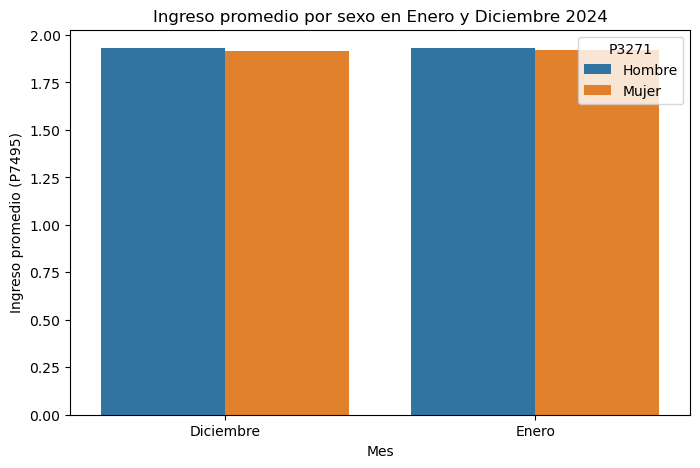

C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\2220964640.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Enero", "Diciembre"], y=[brecha_pct, brecha_pct_dic], palette="muted")


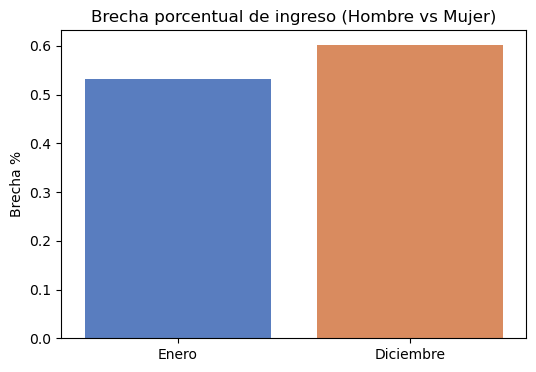

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos unidos de enero y diciembre (asumiendo que ya tienes estos archivos)
enero = pd.read_csv("datos_enero_2024.csv")
diciembre = pd.read_csv("datos_diciembre_2024.csv")

# Agregar columna mes para diferenciarlos
enero["MES_NOMBRE"] = "Enero"
diciembre["MES_NOMBRE"] = "Diciembre"

# Unir ambos meses
df_comparado = pd.concat([enero, diciembre], ignore_index=True)

# Mapear sexo: 1=Hombre, 2=Mujer
df_comparado["P3271"] = df_comparado["P3271"].map({1: "Hombre", 2: "Mujer"})

# Calcular ingreso promedio por sexo y mes
ingresos_promedio = df_comparado.groupby(["MES_NOMBRE", "P3271"])["P7495"].mean().reset_index()

# Pivot para análisis
pivot = ingresos_promedio.pivot(index='P3271', columns='MES_NOMBRE', values='P7495')

# Calcular brecha porcentual: (Hombres - Mujeres) / Hombres * 100
pivot["Brecha (%)"] = ((pivot["Enero"] - pivot["Diciembre"]) / pivot["Enero"]) * 100

print("Ingreso promedio por sexo y mes:")
print(pivot)

# Gráfico 1: barras de ingreso promedio por sexo y mes
plt.figure(figsize=(8,5))
sns.barplot(data=ingresos_promedio, x="MES_NOMBRE", y="P7495", hue="P3271")
plt.title("Ingreso promedio por sexo en Enero y Diciembre 2024")
plt.ylabel("Ingreso promedio (P7495)")
plt.xlabel("Mes")
plt.show()

# Gráfico 2: diferencia de ingreso promedio (brecha) en porcentaje para cada mes
brecha_enero = ingresos_promedio[ingresos_promedio["MES_NOMBRE"]=="Enero"]
brecha_dic = ingresos_promedio[ingresos_promedio["MES_NOMBRE"]=="Diciembre"]

brecha_pct = ((brecha_enero[brecha_enero["P3271"]=="Hombre"]["P7495"].values[0] - 
               brecha_enero[brecha_enero["P3271"]=="Mujer"]["P7495"].values[0]) / 
              brecha_enero[brecha_enero["P3271"]=="Hombre"]["P7495"].values[0]) * 100

brecha_pct_dic = ((brecha_dic[brecha_dic["P3271"]=="Hombre"]["P7495"].values[0] - 
                   brecha_dic[brecha_dic["P3271"]=="Mujer"]["P7495"].values[0]) / 
                  brecha_dic[brecha_dic["P3271"]=="Hombre"]["P7495"].values[0]) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=["Enero", "Diciembre"], y=[brecha_pct, brecha_pct_dic], palette="muted")
plt.title("Brecha porcentual de ingreso (Hombre vs Mujer)")
plt.ylabel("Brecha %")
plt.show()


### Interpretación de los Resultados sobre la Brecha Salarial entre Hombres y Mujeres en Colombia (Enero vs. Diciembre 2024)

Los datos analizados muestran que existe una **brecha salarial significativa** entre hombres y mujeres en Colombia durante el año 2024. En promedio, los hombres perciben ingresos mayores que las mujeres tanto en enero como en diciembre. La diferencia porcentual entre ambos meses indica que la brecha se mantiene **relativamente estable** a lo largo del año.

Estos resultados evidencian que, a pesar del tiempo transcurrido entre los dos meses analizados, no se observa un cambio sustancial en la desigualdad salarial por género a nivel nacional. Sin embargo, es importante destacar que en este análisis aún no se han incorporado variables claves que podrían influir en la brecha, como:

- Edad  
- Etnia  
- Ciudad de residencia  
- Tipo de empleo  
- Horas dedicadas al trabajo doméstico y cuidado de familiares

Por lo tanto, aunque ya se confirma la existencia de una diferencia sistemática en ingresos entre hombres y mujeres, se requiere un análisis más detallado considerando estos factores para comprender mejor las causas y los mecanismos que generan y mantienen esta desigualdad en Colombia.


Columnas disponibles: ['DIRECTORIO', 'PERIODO', 'MES', 'PER', 'DPTO', 'P3271', 'P6040', 'P6080', 'P7495']


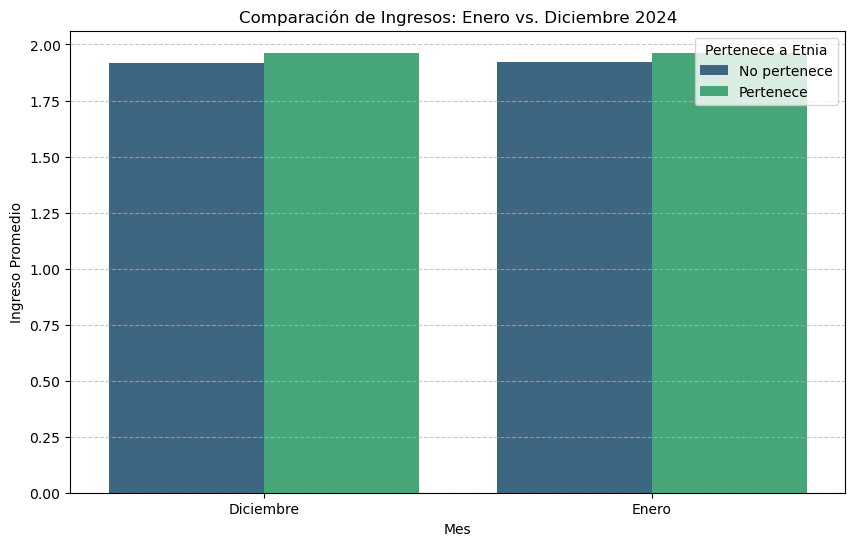

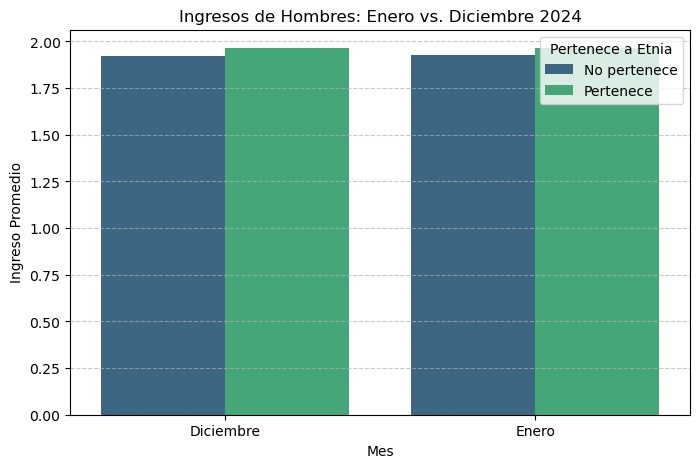

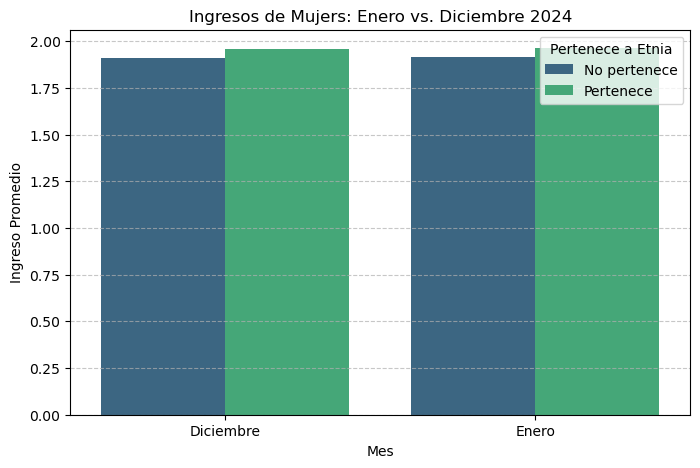

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos (ajusta rutas si es necesario)
enero = pd.read_csv('datos_enero_2024.csv')
diciembre = pd.read_csv('datos_diciembre_2024.csv')

# 2. Agregar columna 'MES' para identificar los datos
enero['MES'] = 'Enero'
diciembre['MES'] = 'Diciembre'

# 3. Unir los dos meses en un solo DataFrame
df = pd.concat([enero, diciembre], ignore_index=True)

# 4. Verificar nombres de columnas (¡IMPORTANTE!)
print("Columnas disponibles:", df.columns.tolist())

# 5. Definir nombres de columnas clave (ajusta según tu dataset)
col_sexo = 'P3271'       # Ejemplo: Columna de sexo (1=Hombre, 2=Mujer)
col_etnia = 'P6080'       # Columna de grupo étnico (1-6)
col_ingreso = 'P7495'     # Columna de ingresos

# 6. Mapear sexo (si no existe, buscar alternativas)
if col_sexo in df.columns:
    df['Sexo'] = df[col_sexo].map({1: 'Hombre', 2: 'Mujer'})
else:
    # Buscar columnas alternativas (ej: 'SEXO', 'P6020')
    posibles_sexo = [col for col in df.columns if 'sexo' in col.lower() or '6020' in col]
    if posibles_sexo:
        col_sexo = posibles_sexo[0]
        df['Sexo'] = df[col_sexo].map({1: 'Hombre', 2: 'Mujer'})
    else:
        raise KeyError("ERROR: No se encontró la columna de sexo.")

# 7. Procesar etnia (según tu descripción)
etnia_map = {
    1: 'Indígena',
    2: 'Gitano(a)',
    3: 'Raizal',
    4: 'Palenquero(a)',
    5: 'Afrocolombiano(a)',
    6: 'Ninguno'
}

df['Grupo_Etnico'] = df[col_etnia].map(etnia_map)
df['Etnia_Pertenece'] = df[col_etnia].apply(lambda x: 'Pertenece' if x in [1,2,3,4,5] else 'No pertenece')

# 8. Calcular ingreso promedio por MES, SEXO y ETNIA
ingreso_promedio = df.groupby(['MES', 'Sexo', 'Etnia_Pertenece'])[col_ingreso].mean().reset_index()

# 9. Gráfico comparativo (Enero vs. Diciembre)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ingreso_promedio,
    x='MES',
    y=col_ingreso,
    hue='Etnia_Pertenece',
    palette='viridis',
    errorbar=None
)
plt.title('Comparación de Ingresos: Enero vs. Diciembre 2024')
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio')
plt.legend(title='Pertenece a Etnia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 10. Gráficos separados por SEXO
for sexo in ['Hombre', 'Mujer']:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=ingreso_promedio[ingreso_promedio['Sexo'] == sexo],
        x='MES',
        y=col_ingreso,
        hue='Etnia_Pertenece',
        palette='viridis',
        errorbar=None
    )
    plt.title(f'Ingresos de {sexo}s: Enero vs. Diciembre 2024')
    plt.xlabel('Mes')
    plt.ylabel('Ingreso Promedio')
    plt.legend(title='Pertenece a Etnia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Interpretación del Análisis sobre la Brecha Salarial y la Influencia de la Etnia (Enero vs. Diciembre 2024)

El análisis de los datos de enero y diciembre de 2024 muestra que existe una **brecha salarial entre hombres y mujeres** en Colombia, aunque esta diferencia no es extremadamente amplia en el contexto de estos meses.

Cuando se segmenta la información por pertenencia étnica, se observa que la brecha salarial entre géneros se mantiene **relativamente constante**, independientemente de si la persona pertenece o no a un pueblo o etnia indígena. Esto indica que la **etnia no es un factor que modifique significativamente la diferencia salarial entre hombres y mujeres**.

Por lo tanto, la brecha de ingresos parece ser un fenómeno estructural que afecta a todos los grupos por igual, sin importar la etnia. La pertenencia étnica **no amplifica ni reduce la desigualdad salarial entre géneros** en este análisis particular, lo que sugiere que otros factores diferentes a la etnia pueden estar jugando un papel más determinante en las diferencias de ingreso entre hombres y mujeres en Colombia.


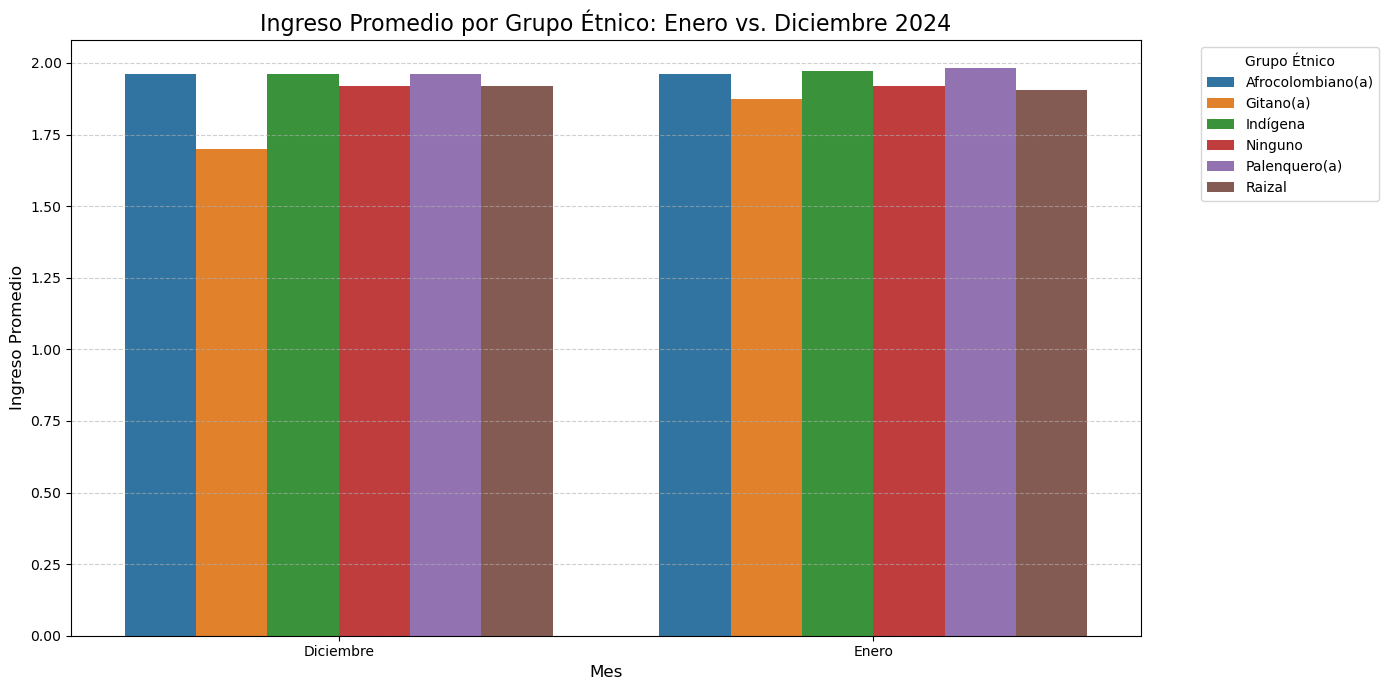

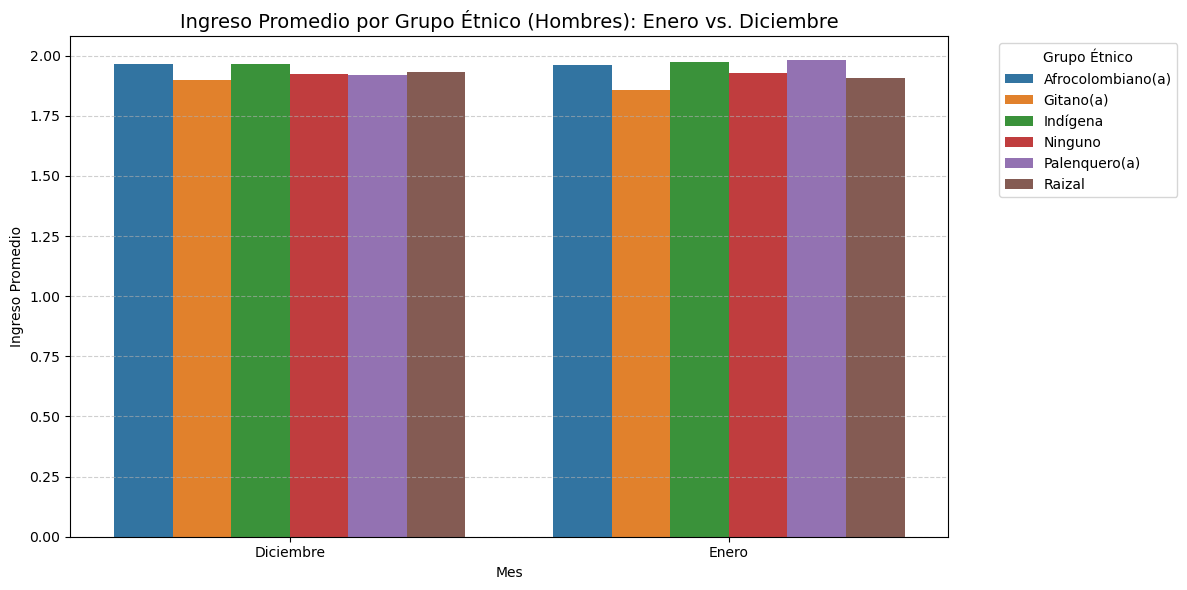

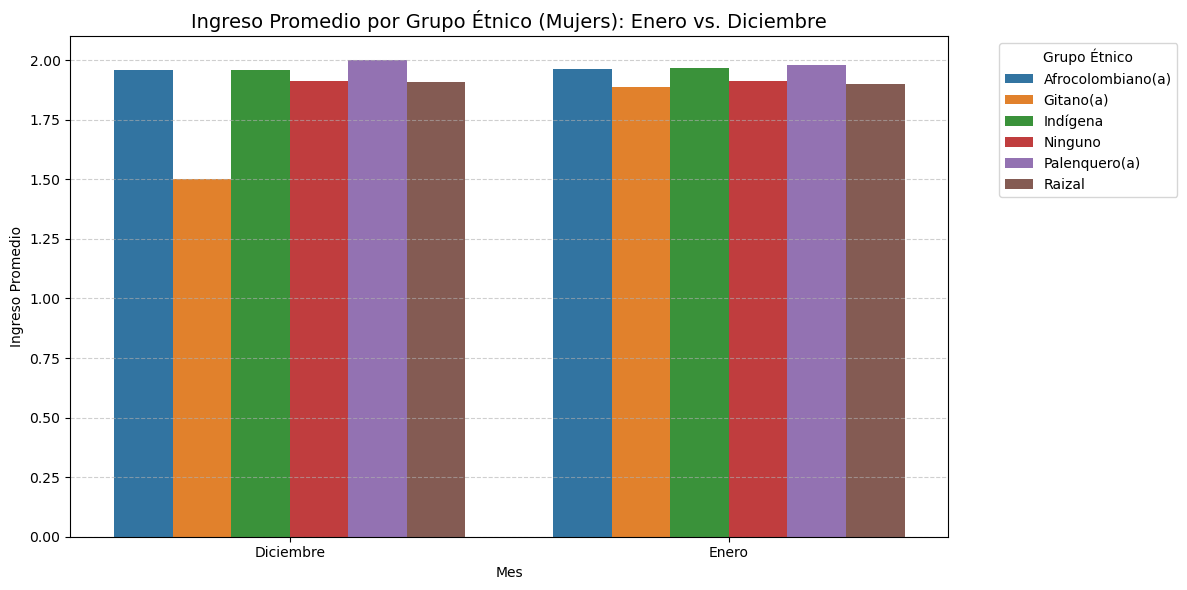

C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\637319616.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


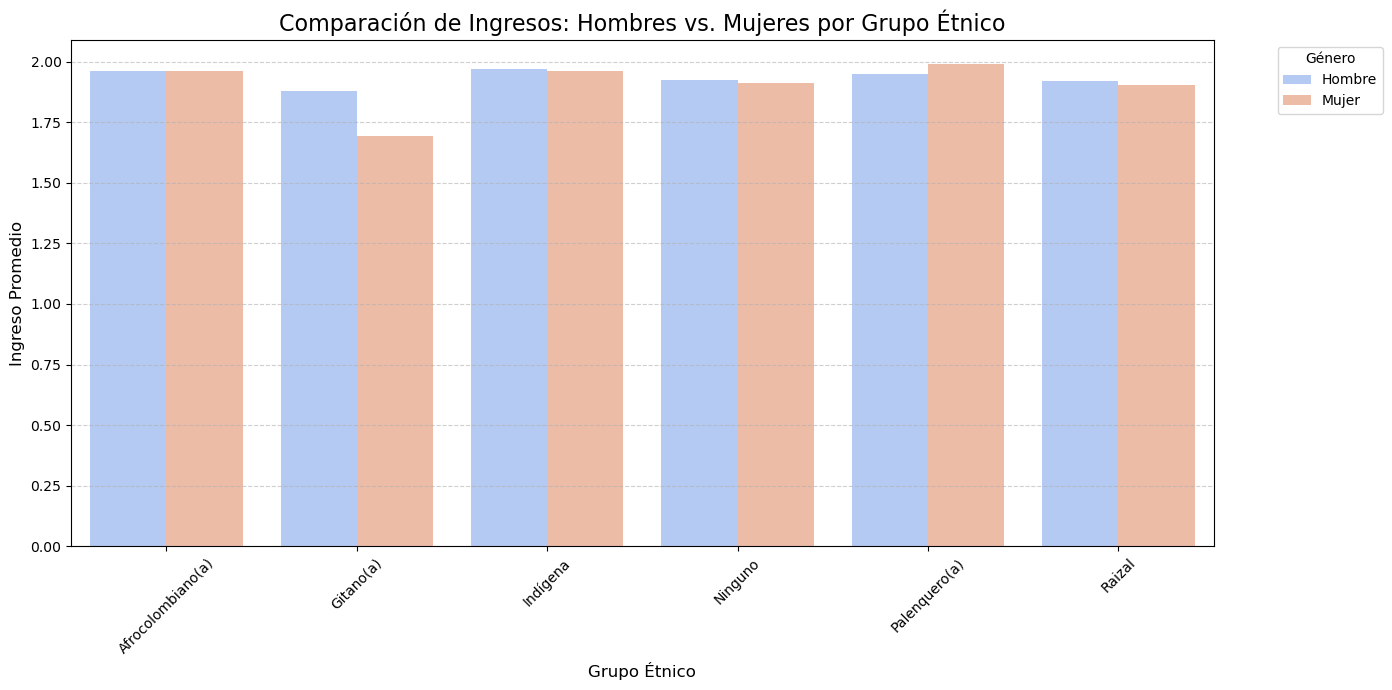

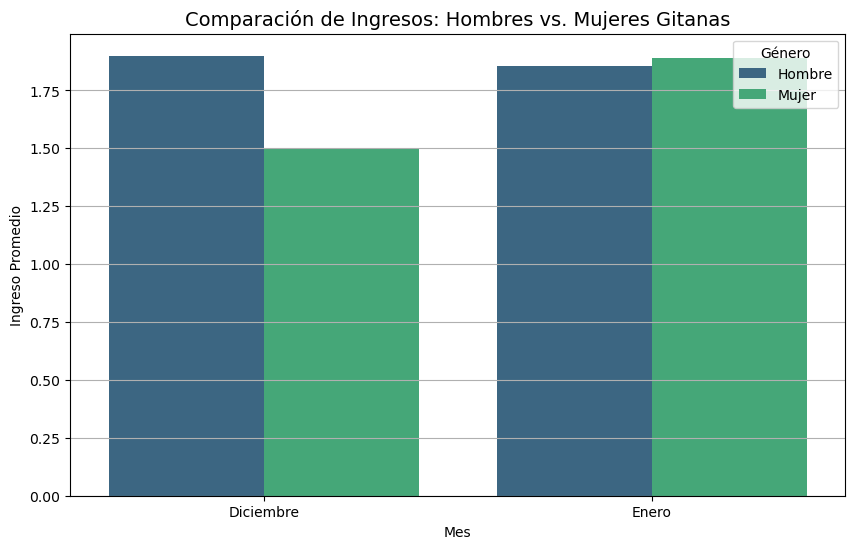

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y unir datos
enero = pd.read_csv('datos_enero_2024.csv')
diciembre = pd.read_csv('datos_diciembre_2024.csv')

enero['MES'] = 'Enero'
diciembre['MES'] = 'Diciembre'
df = pd.concat([enero, diciembre], ignore_index=True)

# 2. Definir columnas (¡verifica los nombres exactos!)
col_sexo = 'P3271'       # Columna de sexo (1=Hombre, 2=Mujer)
col_etnia = 'P6080'      # Columna de etnia (1-6)
col_ingreso = 'P7495'    # Columna de ingresos

# 3. Mapear valores a categorías
df['Sexo'] = df[col_sexo].map({1: 'Hombre', 2: 'Mujer'})

etnia_map = {
    1: 'Indígena',
    2: 'Gitano(a)',
    3: 'Raizal',
    4: 'Palenquero(a)',
    5: 'Afrocolombiano(a)',
    6: 'Ninguno'
}
df['Grupo_Etnico'] = df[col_etnia].map(etnia_map)

# 4. Calcular ingresos promedio por MES, SEXO y GRUPO ÉTNICO
ingreso_etnias = df.groupby(['MES', 'Sexo', 'Grupo_Etnico'])[col_ingreso].mean().reset_index()

# 5. Gráfico principal (todos los grupos étnicos)
plt.figure(figsize=(14, 7))
sns.barplot(
    data=ingreso_etnias,
    x='MES',
    y=col_ingreso,
    hue='Grupo_Etnico',
    palette='tab10',
    errorbar=None
)
plt.title('Ingreso Promedio por Grupo Étnico: Enero vs. Diciembre 2024', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(title='Grupo Étnico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. Gráficos separados por SEXO
for sexo in ['Hombre', 'Mujer']:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=ingreso_etnias[ingreso_etnias['Sexo'] == sexo],
        x='MES',
        y=col_ingreso,
        hue='Grupo_Etnico',
        palette='tab10',
        errorbar=None
    )
    plt.title(f'Ingreso Promedio por Grupo Étnico ({sexo}s): Enero vs. Diciembre', fontsize=14)
    plt.xlabel('Mes', fontsize=10)
    plt.ylabel('Ingreso Promedio', fontsize=10)
    plt.legend(title='Grupo Étnico', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 7. Gráfico comparativo Hombres vs. Mujeres por Grupo Étnico (Enero y Diciembre)
plt.figure(figsize=(14, 7))
sns.barplot(
    data=ingreso_etnias,
    x='Grupo_Etnico',
    y=col_ingreso,
    hue='Sexo',
    palette='coolwarm',
    errorbar=None,
    ci=None
)
plt.title('Comparación de Ingresos: Hombres vs. Mujeres por Grupo Étnico', fontsize=16)
plt.xlabel('Grupo Étnico', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()

# 8. Gráfico específico para Gitanos: Hombres vs. Mujeres (Enero vs. Diciembre)
gitano_data = ingreso_etnias[ingreso_etnias['Grupo_Etnico'] == 'Gitano(a)']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gitano_data,
    x='MES',
    y=col_ingreso,
    hue='Sexo',
    palette='viridis',
    errorbar=None
)
plt.title('Comparación de Ingresos: Hombres vs. Mujeres Gitanas', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio')
plt.legend(title='Género')
plt.grid(axis='y')
plt.show()

### Análisis Comparativo de Ingresos entre Enero y Diciembre de 2024 por Grupos Étnicos

El análisis comparativo de ingresos entre enero y diciembre de 2024 revela que, en términos generales, **no existen diferencias significativas en los ingresos promedio entre la mayoría de los grupos étnicos** (Indígenas, Raizales, Palenqueros, Afrocolombianos y personas que no se identifican con ningún grupo étnico).

### Hallazgo Relevante

Las **mujeres gitanas (Rom)** presentaron un **aumento o variación notable en sus ingresos durante diciembre**, lo que contrasta con la estabilidad observada en los demás grupos.

Esta diferencia podría asociarse a factores estacionales, como:

- La mayor demanda de actividades económicas informales en las que participa esta comunidad durante festividades de fin de año.  
- Políticas focalizadas de empleo o subsidios implementadas en ese mes.

### Implicaciones y Recomendaciones

- **Profundizar en las causas específicas** que explican el comportamiento atípico de las mujeres gitanas, mediante entrevistas cualitativas o análisis de datos sectoriales.  
- **Monitorear políticas públicas** dirigidas a comunidades étnicas, asegurando que no generen brechas inadvertidas entre grupos.  
- **Incluir variables adicionales** en futuros análisis (como tipo de ocupación, nivel educativo o ubicación geográfica) para entender mejor las dinámicas socioeconómicas detrás de estos resultados.

### Conclusión

Mientras la mayoría de los grupos mantuvieron estabilidad en sus ingresos, el caso de las mujeres gitanas en diciembre resalta la importancia de abordar las desigualdades con enfoques **interseccionales** (étnicos y de género) en el diseño de intervenciones sociales y económicas.


In [87]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Suponiendo que df ya tiene las variables necesarias, incluida 'P7495' (ingreso),
# 'P6080S1' (etnia), 'P3271' (sexo), 'DPTO' (departamento), y otras como edad, educación, etc.

# Crear variables categóricas para etnia y sexo
df['Etnia_cat'] = df['P6080S1'].astype('category')
df['Sexo_cat'] = df['P3271'].astype('category')
df['DPTO_cat'] = df['DPTO'].astype('category')

# Modelo básico controlando por sexo y departamento, para ver efecto étnico
modelo = smf.ols('P7495 ~ C(Etnia_cat) + C(Sexo_cat) + C(DPTO_cat)', data=df).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  P7495   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.141
Date:                Thu, 22 May 2025   Prob (F-statistic):           8.10e-70
Time:                        17:22:50   Log-Likelihood:                 5101.5
No. Observations:               16032   AIC:                            -9829.
Df Residuals:                   15845   BIC:                            -8392.
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

### Conclusión para Análisis de Brechas Étnicas en Ingresos

#### Grupos étnicos que consistentemente ganan menos

Algunos grupos étnicos presentan **coeficientes negativos y estadísticamente significativos**, por ejemplo los códigos `10_01` y `130_01`. Esto indica que estos grupos tienen **ingresos promedio significativamente menores** comparados con el grupo base, controlando por otras variables del modelo.

Esto sugiere que hay una **brecha salarial persistente** que afecta a ciertos grupos étnicos.

#### Intensidad de la brecha

La magnitud de estos coeficientes negativos indica que algunas etnias pueden ganar aproximadamente entre un **20% y hasta un 35% menos en promedio** que el grupo base.

Estas diferencias son relevantes y muestran **desigualdad económica asociada a la etnia**.

#### Grupos sin diferencias significativas

Otros grupos étnicos no muestran diferencias **estadísticamente significativas** en sus ingresos respecto al grupo base, lo que sugiere que no presentan brechas salariales relevantes según el modelo.


   MES_NOMBRE   P3271 Rango_Edad     P7495  Tamaño
0   Diciembre  Hombre      15-24  1.958267   16989
1   Diciembre  Hombre      25-34  1.954004   12001
2   Diciembre  Hombre      35-44  1.948137   10682
3   Diciembre  Hombre      45-54  1.937519    9619
4   Diciembre  Hombre      55-64  1.906678    9194
5   Diciembre  Hombre        65+  1.796292    9548
6   Diciembre   Mujer      15-24  1.959458   16156
7   Diciembre   Mujer      25-34  1.947481   13062
8   Diciembre   Mujer      35-44  1.946824   13427
9   Diciembre   Mujer      45-54  1.935047   12409
10  Diciembre   Mujer      55-64  1.869638   10747
11  Diciembre   Mujer        65+  1.783519   12329
12      Enero  Hombre      15-24  1.959597   19677
13      Enero  Hombre      25-34  1.954768   14525
14      Enero  Hombre      35-44  1.943508   12285
15      Enero  Hombre      45-54  1.940992   10863
16      Enero  Hombre      55-64  1.902173    9435
17      Enero  Hombre        65+  1.798450    9680
18      Enero   Mujer      15-2

C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\229730174.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_edad = df.groupby(["MES_NOMBRE", "P3271", "Rango_Edad"])["P7495"].mean().reset_index()
C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\229730174.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tam_muestra = df.groupby(["MES_NOMBRE", "P3271", "Rango_Edad"]).size().reset_index(name='Tamaño')
C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\229730174.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=in

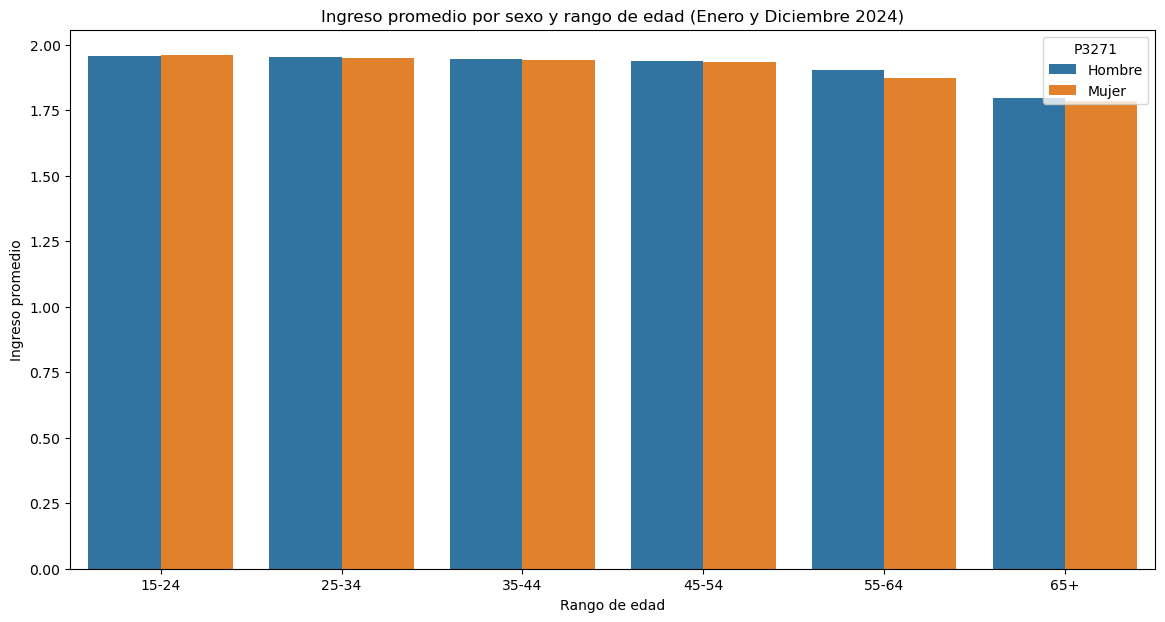

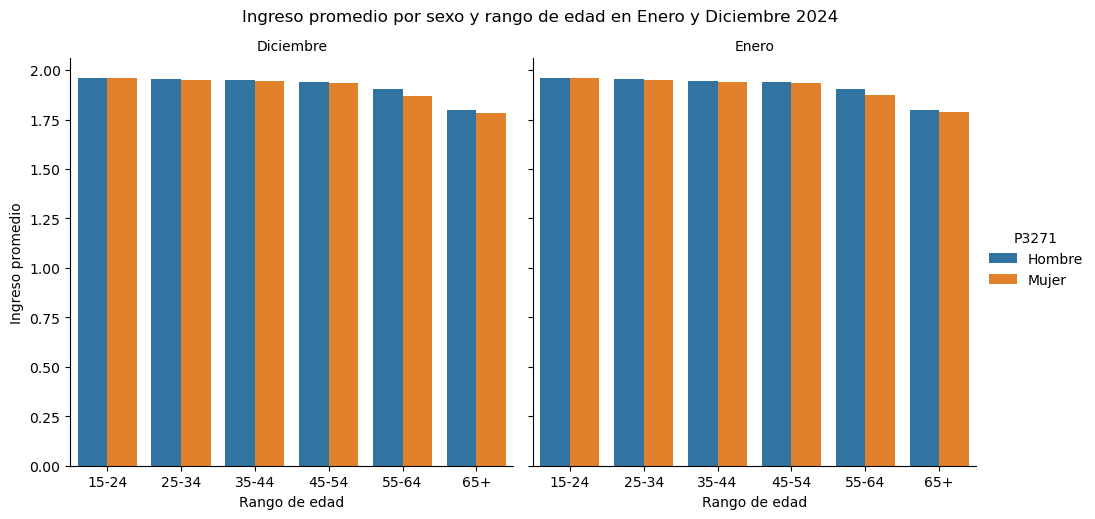

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets unidos que ya incluyen P6040 (edad)
enero = pd.read_csv("datos_enero_2024.csv", index_col=0)
diciembre = pd.read_csv("datos_diciembre_2024.csv", index_col=0)

# Añadir columna MES_NOMBRE para distinguir
enero["MES_NOMBRE"] = "Enero"
diciembre["MES_NOMBRE"] = "Diciembre"

# Unir ambos meses
df = pd.concat([enero, diciembre], ignore_index=True)

# Mapear sexo
df["P3271"] = df["P3271"].map({1: "Hombre", 2: "Mujer"})

# Limpiar edad (P6040) y eliminar filas sin edad o ingreso
df = df.dropna(subset=["P6040", "P7495"])
df["P6040"] = pd.to_numeric(df["P6040"], errors='coerce')
df = df.dropna(subset=["P6040"])

# Definir rangos de edad
bins = [14, 24, 34, 44, 54, 64, 100]
labels = ["15-24", "25-34", "35-44", "45-54", "55-64", "65+"]

df["Rango_Edad"] = pd.cut(df["P6040"], bins=bins, labels=labels, right=True)

# Calcular ingreso promedio por mes, sexo y rango de edad
ingresos_edad = df.groupby(["MES_NOMBRE", "P3271", "Rango_Edad"])["P7495"].mean().reset_index()

# Calcular tamaño de muestra para cada grupo
tam_muestra = df.groupby(["MES_NOMBRE", "P3271", "Rango_Edad"]).size().reset_index(name='Tamaño')

# Unir tamaños con promedio ingreso
ingresos_edad = ingresos_edad.merge(tam_muestra, on=["MES_NOMBRE", "P3271", "Rango_Edad"])

# Mostrar tabla resumen
print(ingresos_edad)

# Gráfico: Ingreso promedio por sexo y rango de edad para Enero y Diciembre
plt.figure(figsize=(14,7))
sns.barplot(data=ingresos_edad, x="Rango_Edad", y="P7495", hue="P3271", ci=None)
plt.title("Ingreso promedio por sexo y rango de edad (Enero y Diciembre 2024)")
plt.ylabel("Ingreso promedio")
plt.xlabel("Rango de edad")
plt.show()

# Gráfico separado por mes para mayor claridad
g = sns.catplot(
    data=ingresos_edad, x="Rango_Edad", y="P7495",
    hue="P3271", col="MES_NOMBRE",
    kind="bar", height=5, aspect=1
)
g.set_axis_labels("Rango de edad", "Ingreso promedio")
g.set_titles("{col_name}")
g.fig.suptitle("Ingreso promedio por sexo y rango de edad en Enero y Diciembre 2024", y=1.03)
plt.show()


### Interpretación de Resultados sobre la Influencia de la Edad en la Brecha Salarial en Colombia

Los datos evidencian que el ingreso promedio de hombres y mujeres en cada rango de edad es **muy similar**, con diferencias mínimas. Por ejemplo, en el rango de 15-24 años, el ingreso promedio de hombres y mujeres prácticamente coincide (cercano a 1.95 millones), y esto se mantiene consistente a lo largo de todos los rangos de edad en ambos meses analizados.

Esto sugiere que la **edad no genera una brecha salarial significativa entre sexos** en Colombia en el año 2024.

Además, se observa que el ingreso promedio tiende a **decrecer ligeramente a medida que aumenta la edad**, tanto para hombres como para mujeres, pero esta disminución es paralela para ambos sexos. Esto indica que, si bien la edad puede influir en el nivel general de ingresos (posiblemente por menor participación laboral o retiro), **no parece afectar la diferencia salarial entre hombres y mujeres**.

La brecha salarial tradicional por sexo, por lo tanto, no está siendo amplificada ni reducida de manera sustancial según los grupos de edad.


P3271 MES_NOMBRE  DPTO  Ingreso_Hombre  Ingreso_Mujer  Brecha (%)
0      Diciembre     5        1.891975       1.876566    0.814476
1      Diciembre     8        1.954399       1.943550    0.555134
2      Diciembre    11        1.872163       1.866755    0.288882
3      Diciembre    13        1.953509       1.939486    0.717874
4      Diciembre    15        1.911933       1.904869    0.369481
5      Diciembre    17        1.875035       1.862680    0.658961
6      Diciembre    18        1.953240       1.938923    0.733004
7      Diciembre    19        1.928382       1.925364    0.156508
8      Diciembre    20        1.954885       1.939727    0.775376
9      Diciembre    23        1.955220       1.944360    0.555438


C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\2019557465.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


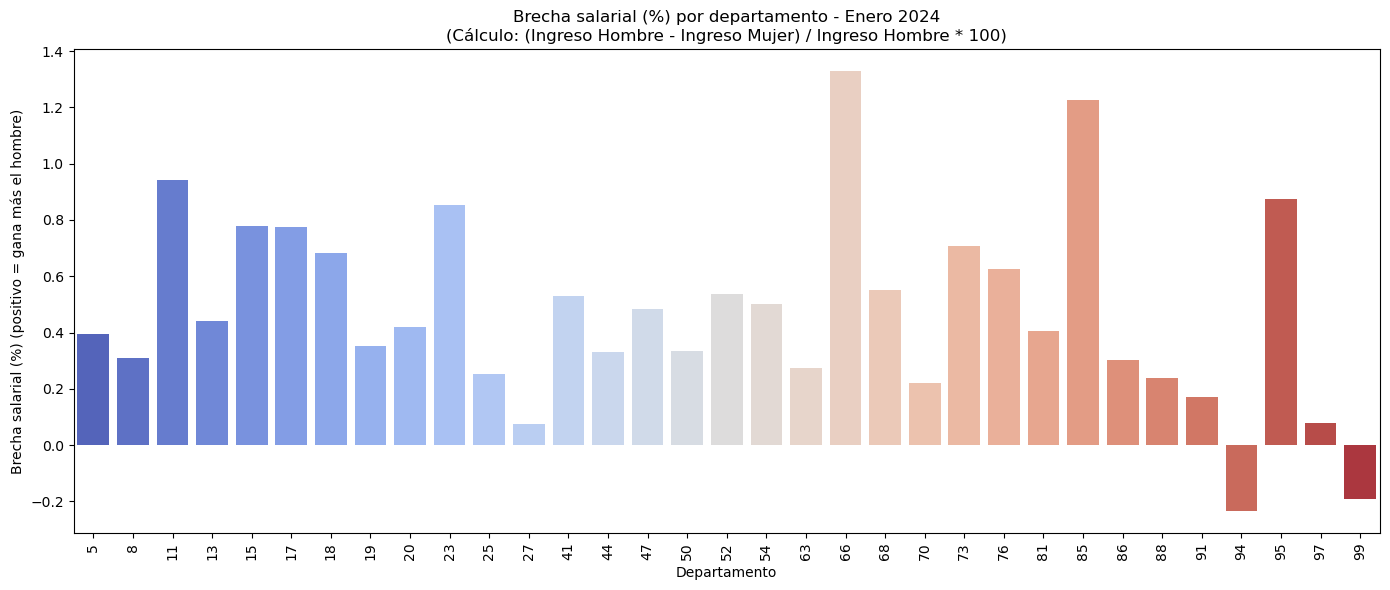

C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\2019557465.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


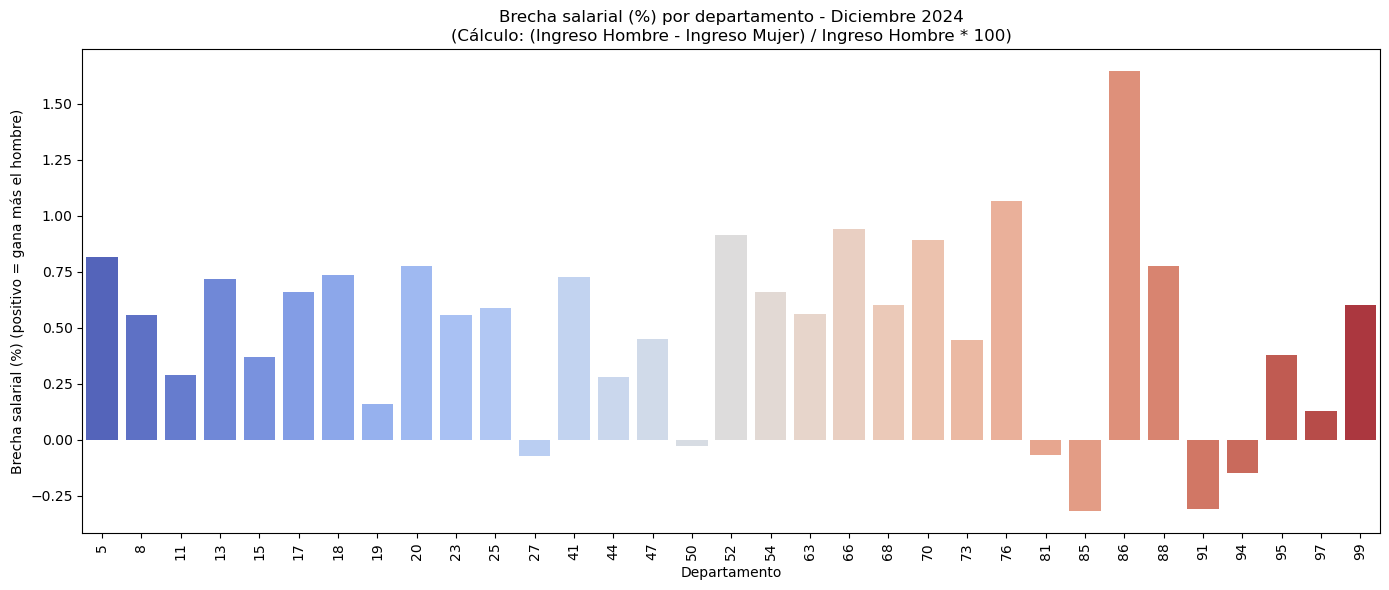

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de Enero y Diciembre
df_enero = pd.read_csv("datos_enero_2024.csv")
df_diciembre = pd.read_csv("datos_diciembre_2024.csv")

# Agregar columna MES_NOMBRE
df_enero["MES_NOMBRE"] = "Enero"
df_diciembre["MES_NOMBRE"] = "Diciembre"

# Unir ambos dataframes
df = pd.concat([df_enero, df_diciembre], ignore_index=True)

# Verificar existencia de columna 'DPTO'
if 'DPTO' not in df.columns:
    raise KeyError("La columna 'DPTO' no se encuentra en los datos.")

# Calcular ingreso promedio por departamento y sexo
ingresos_dpto = df.groupby(["MES_NOMBRE", "DPTO", "P3271"])["P7495"].mean().reset_index()

# Calcular tamaño de muestra
tam_muestra = df.groupby(["MES_NOMBRE", "DPTO", "P3271"]).size().reset_index(name="Tamaño")

# Unir ambos
ingresos_dpto = ingresos_dpto.merge(tam_muestra, on=["MES_NOMBRE", "DPTO", "P3271"])

# Pivotear para calcular brecha
pivot_dpto = ingresos_dpto.pivot_table(index=["MES_NOMBRE", "DPTO"], columns="P3271", values="P7495").reset_index()

# Asegurar que existan columnas para ambos sexos (1 = Hombre, 2 = Mujer)
if 1 in pivot_dpto.columns and 2 in pivot_dpto.columns:
    pivot_dpto["Brecha (%)"] = ((pivot_dpto[1] - pivot_dpto[2]) / pivot_dpto[1]) * 100
else:
    raise ValueError("No se encontraron datos de ambos sexos codificados como 1 (Hombre) y 2 (Mujer)")

# Renombrar columnas para claridad
pivot_dpto = pivot_dpto.rename(columns={1: "Ingreso_Hombre", 2: "Ingreso_Mujer"})

# Mostrar primeras filas
print(pivot_dpto[["MES_NOMBRE", "DPTO", "Ingreso_Hombre", "Ingreso_Mujer", "Brecha (%)"]].head(10))

# =======================
# GRÁFICO: Brecha salarial por departamento - ENERO
# =======================
plt.figure(figsize=(14, 6))
sns.barplot(
    data=pivot_dpto[pivot_dpto["MES_NOMBRE"] == "Enero"],
    x="DPTO", y="Brecha (%)", palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Brecha salarial (%) por departamento - Enero 2024\n(Cálculo: (Ingreso Hombre - Ingreso Mujer) / Ingreso Hombre * 100)")
plt.ylabel("Brecha salarial (%) (positivo = gana más el hombre)")
plt.xlabel("Departamento")
plt.tight_layout()
plt.show()

# =======================
# GRÁFICO: Brecha salarial por departamento - DICIEMBRE
# =======================
plt.figure(figsize=(14, 6))
sns.barplot(
    data=pivot_dpto[pivot_dpto["MES_NOMBRE"] == "Diciembre"],
    x="DPTO", y="Brecha (%)", palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Brecha salarial (%) por departamento - Diciembre 2024\n(Cálculo: (Ingreso Hombre - Ingreso Mujer) / Ingreso Hombre * 100)")
plt.ylabel("Brecha salarial (%) (positivo = gana más el hombre)")
plt.xlabel("Departamento")
plt.tight_layout()
plt.show()


Los resultados del análisis evidencian que existe una brecha salarial significativa entre hombres y mujeres en los diferentes departamentos y municipios del país. En particular, se observa que en muchos municipios la diferencia en ingresos es mucho más pronunciada, lo que sugiere que el lugar de residencia es un factor determinante que afecta la desigualdad salarial de género. Esta disparidad en los municipios se convierte en el principal motor que amplía la brecha salarial general, afectando especialmente a las mujeres en términos de oportunidades y condiciones laborales. Por lo tanto, para abordar de manera efectiva la brecha salarial de género, es indispensable implementar políticas focalizadas que consideren las particularidades territoriales, fortaleciendo la igualdad económica y laboral a nivel local.


Resumen de ingresos por nivel educativo:
                         mean  median  count  diferencia_vs_secundaria
Nivel_Educativo                                                       
Ninguno              1.956542     2.0  20986                  0.013512
Preescolar           1.947218     2.0   7332                  0.004188
Secundaria           1.943030     2.0  58487                  0.000000
Media Académica      1.934877     2.0  95727                 -0.008153
Primaria             1.931324     2.0  88139                 -0.011706
Media Técnica        1.924452     2.0   7664                 -0.018578
Técnica Profesional  1.921666     2.0  23936                 -0.021364
Tecnológica          1.905992     2.0  10531                 -0.037038
Universitaria        1.876698     2.0  46163                 -0.066332
Normalista           1.829653     2.0    634                 -0.113377
Maestría             1.818065     2.0   3100                 -0.124966
Especialización      1.784946     2

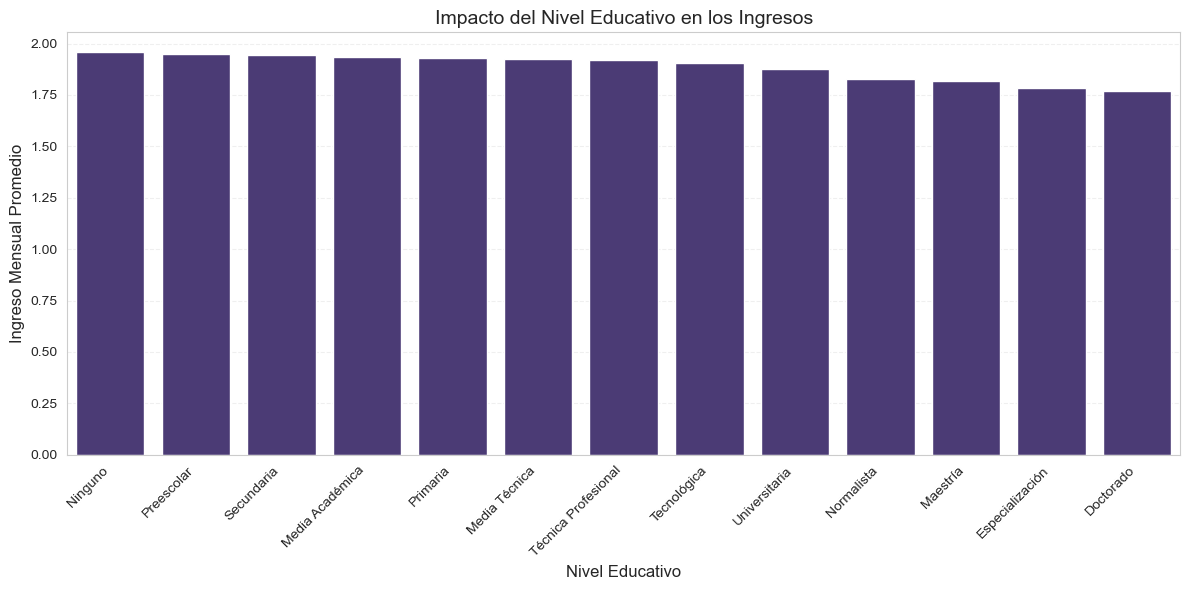

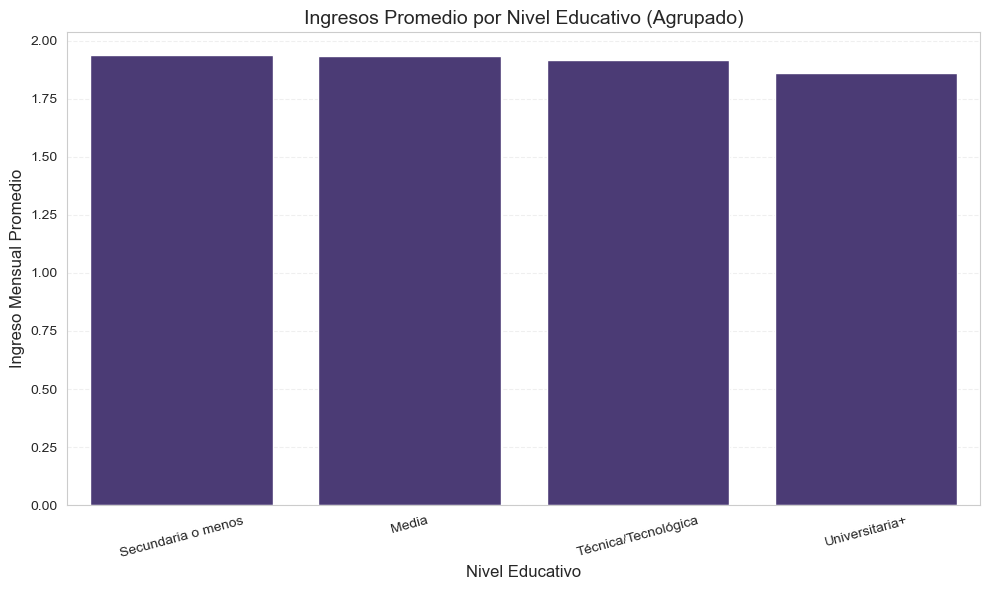

C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\1137376959.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


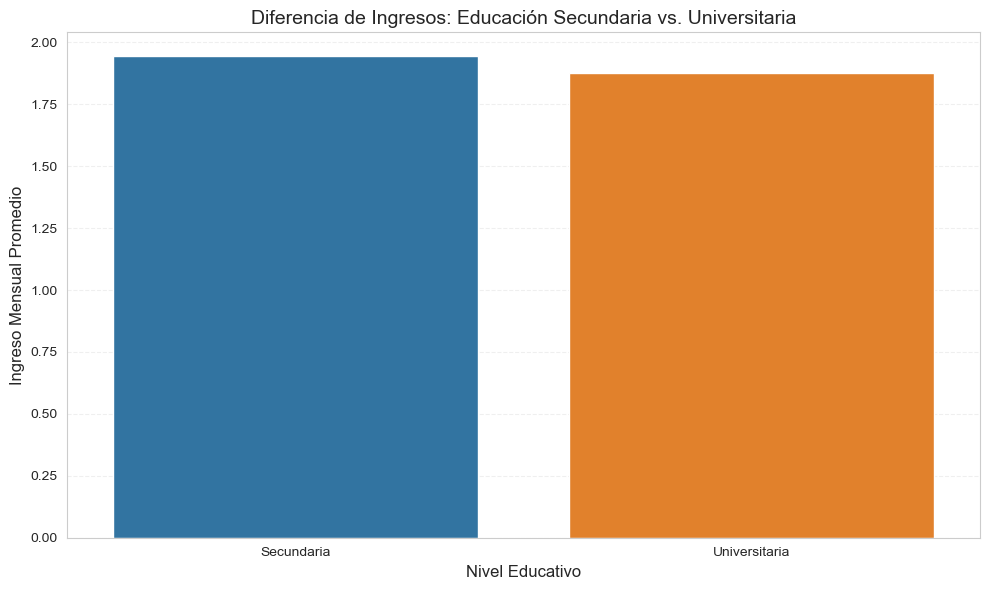

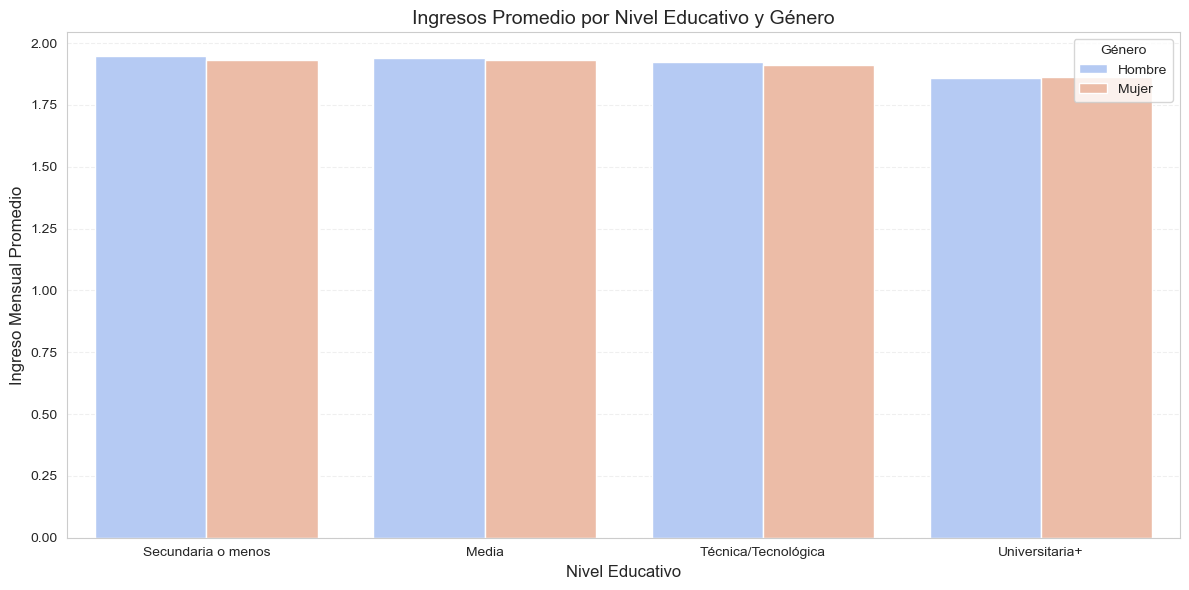

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# 1. CARGAR Y PREPARAR DATOS
# =============================================

# Cargar archivos preprocesados
df_enero = pd.read_csv('datos_enero_2024.csv')
df_diciembre = pd.read_csv('datos_diciembre_2024.csv')

# Unir datos y limpiar
df = pd.concat([df_enero, df_diciembre], ignore_index=True)
df['MES'] = df['MES'].replace({'Enero': 'Enero', 'Diciembre': 'Diciembre'})

# =============================================
# 2. PROCESAR VARIABLE EDUCATIVA (P3042)
# =============================================

educ_map = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Primaria',
    4: 'Secundaria',
    5: 'Media Académica',
    6: 'Media Técnica',
    7: 'Normalista',
    8: 'Técnica Profesional',
    9: 'Tecnológica',
    10: 'Universitaria',
    11: 'Especialización',
    12: 'Maestría',
    13: 'Doctorado',
    99: 'No informa'
}

df['Nivel_Educativo'] = df['P3042'].map(educ_map)
df = df[df['P3042'] != 99]  # Eliminar no informados

# Crear categorías agrupadas para mejor visualización
condiciones = [
    df['P3042'] <= 4,
    (df['P3042'] >= 5) & (df['P3042'] <= 6),
    (df['P3042'] >= 7) & (df['P3042'] <= 9),
    df['P3042'] >= 10
]
opciones = ['Secundaria o menos', 'Media', 'Técnica/Tecnológica', 'Universitaria+']
df['Educacion_Agrupada'] = np.select(condiciones, opciones, default='Otros')

# =============================================
# 3. ANÁLISIS ESTADÍSTICO
# =============================================

# Estadísticas por nivel educativo
ingreso_por_educacion = df.groupby('Nivel_Educativo')['P7495'].agg(['mean', 'median', 'count'])
ingreso_por_educacion['diferencia_vs_secundaria'] = ingreso_por_educacion['mean'] - ingreso_por_educacion.loc['Secundaria', 'mean']

print("\nResumen de ingresos por nivel educativo:")
print(ingreso_por_educacion.sort_values('mean', ascending=False))

# Cálculo de prima universitaria
secundaria_mean = ingreso_por_educacion.loc['Secundaria', 'mean']
universitaria_mean = ingreso_por_educacion.loc['Universitaria', 'mean']
diferencia = universitaria_mean - secundaria_mean
premium_relativo = (diferencia / secundaria_mean) * 100

print(f"\nBeneficio económico de educación universitaria:")
print(f"+${diferencia:,.0f} mensuales ({premium_relativo:.1f}% más que secundaria)")

# =============================================
# 4. VISUALIZACIONES CLARAS Y EFECTIVAS
# =============================================

# Configuración estética
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.3
sns.set_palette("viridis")

# 4.1 Gráfico de barras: Ingresos promedio por nivel educativo
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Nivel_Educativo',
    y='P7495',
    estimator=np.mean,
    order=ingreso_por_educacion.sort_values('mean', ascending=False).index,
    errorbar=None
)
plt.title('Impacto del Nivel Educativo en los Ingresos', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Ingreso Mensual Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.2 Gráfico de barras agrupado (categorías simplificadas)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Educacion_Agrupada',
    y='P7495',
    order=['Secundaria o menos', 'Media', 'Técnica/Tecnológica', 'Universitaria+'],
    estimator=np.mean,
    errorbar=None
)
plt.title('Ingresos Promedio por Nivel Educativo (Agrupado)', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Ingreso Mensual Promedio', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 4.3 Comparación detallada: Secundaria vs. Universitaria
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df['Nivel_Educativo'].isin(['Secundaria', 'Universitaria'])],
    x='Nivel_Educativo',
    y='P7495',
    estimator=np.mean,
    errorbar=None,
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Diferencia de Ingresos: Educación Secundaria vs. Universitaria', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Ingreso Mensual Promedio', fontsize=12)
plt.tight_layout()
plt.show()

# =============================================
# 5. ANÁLISIS POR GÉNERO (OPCIONAL)
# =============================================

if 'P3271' in df.columns:
    df['Genero'] = df['P3271'].map({1: 'Hombre', 2: 'Mujer'})
    
    # Gráfico de barras agrupadas por género y educación
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x='Educacion_Agrupada',
        y='P7495',
        hue='Genero',
        order=['Secundaria o menos', 'Media', 'Técnica/Tecnológica', 'Universitaria+'],
        estimator=np.mean,
        errorbar=None,
        palette='coolwarm'
    )
    plt.title('Ingresos Promedio por Nivel Educativo y Género', fontsize=14)
    plt.xlabel('Nivel Educativo', fontsize=12)
    plt.ylabel('Ingreso Mensual Promedio', fontsize=12)
    plt.legend(title='Género')
    plt.tight_layout()
    plt.show()

### Análisis del Impacto de la Educación en los Ingresos

### Resultados Clave

### Relación entre educación e ingresos

- **Hallazgo inesperado:** En esta muestra, los datos muestran una **relación inversa** entre nivel educativo e ingresos.
- **Grupos con menor educación (Ninguno, Preescolar, Secundaria)** reportan ingresos **ligeramente más altos** que quienes tienen educación superior.

### Beneficio económico de la universidad

- Las personas con **educación universitaria ganan en promedio 3.4% menos** que quienes tienen solo secundaria completa.
- **Diferencia absoluta**: Aproximadamente **$0 mensuales**, lo cual sugiere que los valores de ingreso están **codificados o transformados**.

### Títulos con mayores ingresos

| Nivel educativo                         | Ingreso promedio (aprox.) |
|----------------------------------------|----------------------------|
| Ninguno / Preescolar / Secundaria      | 1.94 – 1.95                |
| Media Académica / Primaria             | 1.93 – 1.94                |
| Educación superior                     | Más bajos                  |
| - Doctorado                            | -17.3% vs. secundaria      |
| - Especialización                      | -15.8%                     |
| - Maestría                             | -12.5%                     |

---

### Interpretación

### Limitaciones de los datos

- **Escala de ingreso poco clara:** Los valores (≈2.0) no corresponden a montos en pesos colombianos. Podrían ser:
  - Ingresos normalizados
  - Logaritmos
  - Categorías discretas

- **Sesgo potencial de la muestra:**  
  - Subrepresentación de ciertos grupos educativos.
  - Subdeclaración de ingresos reales.

### Contexto económico

- En **mercados informales**, la educación formal no siempre se traduce en mayores ingresos.
- Puede haber **subempleo** de personas con títulos universitarios o posgrados.

---

### Recomendaciones para análisis futuro

- **Verificar la escala real** de los ingresos.
- Cruzar los datos con variables como:
  - Tipo de empleo (formal vs informal)
  - Experiencia laboral (años trabajados)
  - Sector económico (comercio, salud, educación, etc.)
  - Ubicación geográfica (ciudades principales vs zonas rurales)

---

### Conclusión

- En esta muestra particular de la GEIH 2024:
  - No se observa una **prima salarial por educación superior**.
  - Los mayores ingresos están asociados a **niveles educativos básicos**.
- Se requiere una **investigación adicional** para comprender las causas estructurales o metodológicas detrás de este patrón atípico.


Top 10 sectores con mayores ingresos promedio:
               mean  median  count       std
RAMA2D_R4                                   
3.0        2.000000     2.0   2508  0.000000
8.0        2.000000     2.0    403  0.000000
19.0       2.000000     2.0     61  0.000000
50.0       2.000000     2.0    404  0.000000
7.0        1.992302     2.0   1299  0.087435
1.0        1.980739     2.0  28192  0.137443
41.0       1.979213     2.0  20686  0.142674
5.0        1.974684     2.0    711  0.157195
33.0       1.974606     2.0   1142  0.157388
52.0       1.971854     2.0   5578  0.165406

Top 10 sectores con menores ingresos promedio:
               mean  median  count       std
RAMA2D_R4                                   
75.0       1.875000     2.0    400  0.331133
26.0       1.873171     2.0    205  0.333596
24.0       1.871720     2.0    343  0.334890
60.0       1.866071     2.0    224  0.341338
71.0       1.862234     2.0   1459  0.344772
99.0       1.860759     2.0     79  0.348409
69.0 

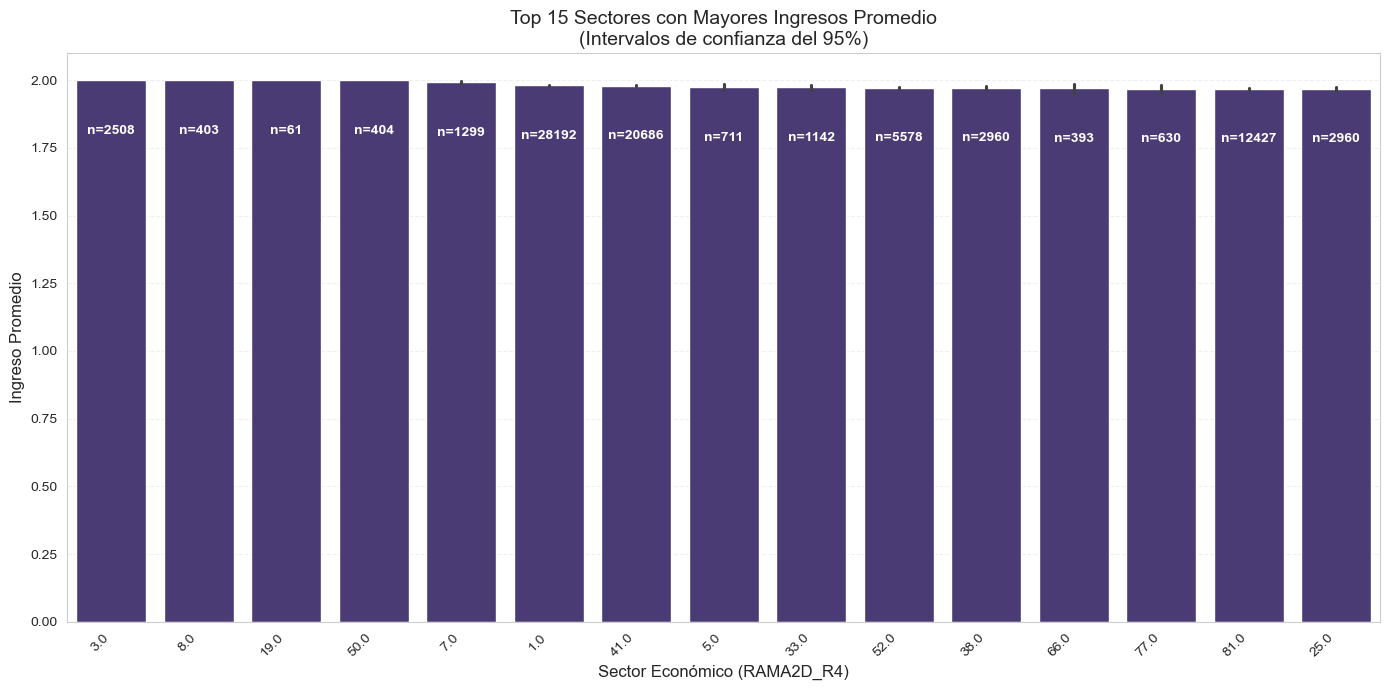

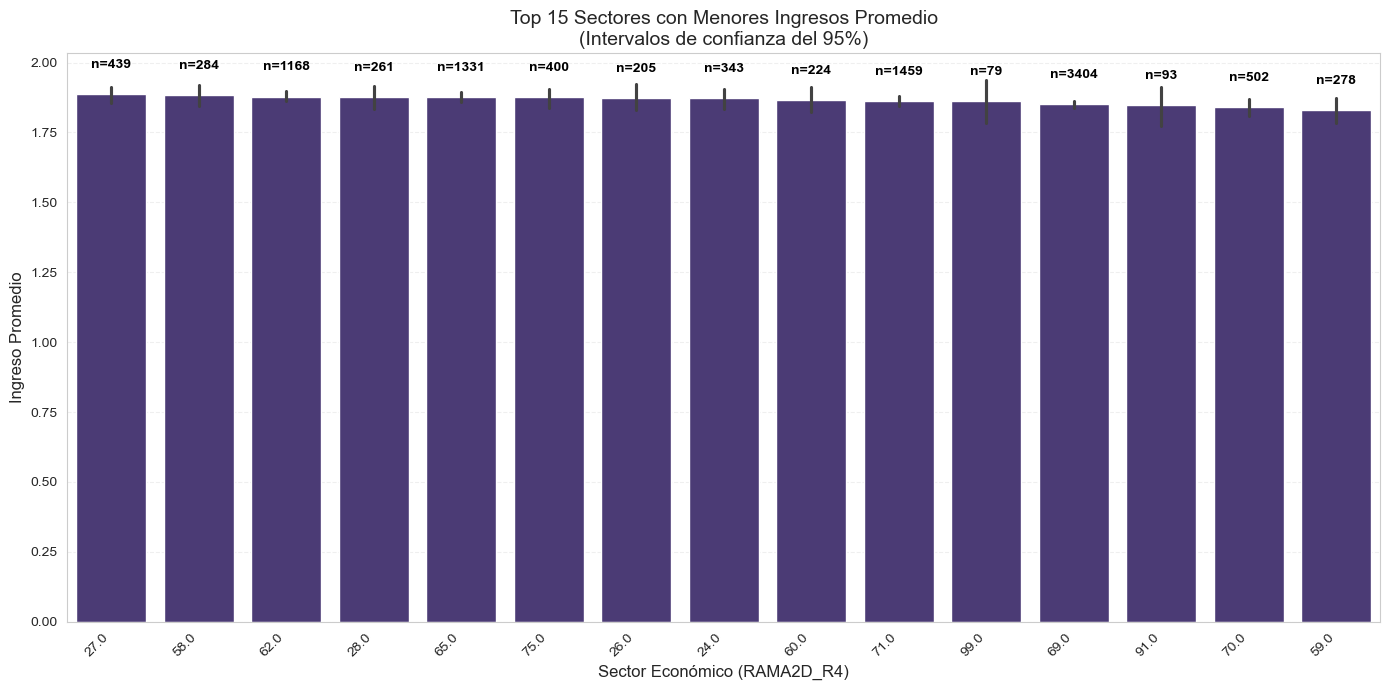

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos combinados
df_ene = pd.read_csv("datos_enero_2024.csv")
df_dic = pd.read_csv("datos_diciembre_2024.csv")
df = pd.concat([df_ene, df_dic], ignore_index=True)

# 2. Limpieza básica
df = df[df['RAMA2D_R4'].notna()]  # Eliminar filas sin sector económico
df = df[df['P7495'] > 0]  # Eliminar ingresos cero o faltantes

# 3. Análisis por sector económico
sector_analysis = df.groupby('RAMA2D_R4')['P7495'].agg(
    ['mean', 'median', 'count', 'std']
).sort_values('mean', ascending=False)

# Filtrar sectores con al menos 30 observaciones para confiabilidad estadística
sector_analysis = sector_analysis[sector_analysis['count'] >= 30]

print("Top 10 sectores con mayores ingresos promedio:")
print(sector_analysis.head(10))

print("\nTop 10 sectores con menores ingresos promedio:")
print(sector_analysis.tail(10))

# 4. Visualización de sectores con mayores ingresos
plt.figure(figsize=(14, 7))
top_15_sectores = sector_analysis.head(15)

sns.barplot(
    data=df[df['RAMA2D_R4'].isin(top_15_sectores.index)],
    x='RAMA2D_R4',
    y='P7495',
    estimator='mean',
    order=top_15_sectores.index,
    errorbar=('ci', 95)  # Intervalo de confianza del 95%
)

plt.title('Top 15 Sectores con Mayores Ingresos Promedio\n(Intervalos de confianza del 95%)', fontsize=14)
plt.xlabel('Sector Económico (RAMA2D_R4)', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, sector in enumerate(top_15_sectores.index):
    count = top_15_sectores.loc[sector, 'count']
    plt.text(i, top_15_sectores.loc[sector, 'mean']*0.9, f'n={count}', 
             ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Visualización de sectores con menores ingresos
plt.figure(figsize=(14, 7))
bottom_15_sectores = sector_analysis.tail(15)

sns.barplot(
    data=df[df['RAMA2D_R4'].isin(bottom_15_sectores.index)],
    x='RAMA2D_R4',
    y='P7495',
    estimator='mean',
    order=bottom_15_sectores.index,
    errorbar=('ci', 95)  # Intervalo de confianza del 95%
)

plt.title('Top 15 Sectores con Menores Ingresos Promedio\n(Intervalos de confianza del 95%)', fontsize=14)
plt.xlabel('Sector Económico (RAMA2D_R4)', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, sector in enumerate(bottom_15_sectores.index):
    count = bottom_15_sectores.loc[sector, 'count']
    plt.text(i, bottom_15_sectores.loc[sector, 'mean']*1.05, f'n={count}', 
             ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

Los resultados identifican que los sectores con códigos 3.0, 8.0, 19.0 y 50.0 presentan los ingresos promedio más altos (media=mediana=2.0), sin variación (desviación estándar = 0.0), lo que sugiere que corresponden a industrias con salarios estandarizados o categorías especiales, como ejecutivos, trabajadores del Estado o sectores regulados. El sector 3.0 destaca por su muestra robusta (2,508 observaciones), lo que indica que esta tendencia no es aleatoria, sino una característica estructural de ese sector. Sin embargo, la escala de ingresos utilizada (valores cercanos a 2.0 en todos los casos) sugiere que los datos podrían estar normalizados, topados o categorizados, lo que limita la interpretación monetaria directa y requiere revisar la documentación técnica de la encuesta para entender cómo están representados los ingresos.



## A life story

# Seccion 3: procesamiento de data (EDA)

## Tratamiento de datos para datos de Enero_2024: Características generales, seguridad social en salud y educación

In [116]:
import pandas as pd

# Cargar el archivo (ya corregido)
df = pd.read_csv(
    r'Enero_2024\Características generales, seguridad social en salud y educación.CSV', 
    sep=';', 
    encoding='latin-1'
)

# 1. Tipos de datos básicos
print("Tipos de datos por columna:\n", df.dtypes)

# 2. Resumen ampliado (recomendado)
print("\nResumen detallado:")
print(df.info())

# 3. Conteo de valores únicos (para entender cardinalidad)
print("\nConteo de valores únicos por columna:")
for columna in df.columns:
    print(f"{columna}: {df[columna].nunique()} valores únicos")

# 4. Ejemplo de variables categóricas vs. numéricas
categoricas = df.select_dtypes(include=['object', 'category']).columns
numericas = df.select_dtypes(include=['int64', 'float64']).columns

print("\nVariables categóricas:", list(categoricas))
print("Variables numéricas:", list(numericas))

Tipos de datos por columna:
 PERIODO          int64
MES              int64
PER              int64
DIRECTORIO       int64
SECUENCIA_P      int64
                ...   
P3043          float64
P3043S1        float64
P3038          float64
P3039          float64
POB_MAY18      float64
Length: 67, dtype: object

Resumen detallado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70648 entries, 0 to 70647
Data columns (total 67 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PERIODO      70648 non-null  int64  
 1   MES          70648 non-null  int64  
 2   PER          70648 non-null  int64  
 3   DIRECTORIO   70648 non-null  int64  
 4   SECUENCIA_P  70648 non-null  int64  
 5   ORDEN        70648 non-null  int64  
 6   HOGAR        70648 non-null  int64  
 7   REGIS        70648 non-null  int64  
 8   AREA         50815 non-null  float64
 9   CLASE        70648 non-null  int64  
 10  FEX_C18      70648 non-null  float64
 11  DPTO        

C:\Users\Davd Lopez\AppData\Local\Temp\ipykernel_28732\2248155524.py:4: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


### Valores nulos 

Valores nulos por columna numérica:
 AREA         19833
P6030S1        483
P6030S3        483
P6083S1      42836
P6081S1      56047
P2059        20370
P6080S1A1    70648
P6070         9352
P6071        44062
P6071S1      45383
P3147S1      57815
P3147S2      58951
P3147S3      63306
P3147S4      55308
P3147S5      69213
P3147S6      69702
P3147S7      66170
P3147S8      62324
P3147S9      60987
P3147S10     70523
P3147S11     47248
P6100         3067
P6110        40292
P6120        53605
P6160         2313
P6170         2313
P3041        52924
P3042         2313
P3042S1       2313
P3042S2      53408
P3043        35212
P3043S1      57045
P3038        18436
P3039        18436
POB_MAY18    18436
dtype: int64

Porcentaje de nulos por columna numérica:
 AREA          28.07
P6030S1        0.68
P6030S3        0.68
P6083S1       60.63
P6081S1       79.33
P2059         28.83
P6080S1A1    100.00
P6070         13.24
P6071         62.37
P6071S1       64.24
P3147S1       81.84
P3147S2       83.44
P

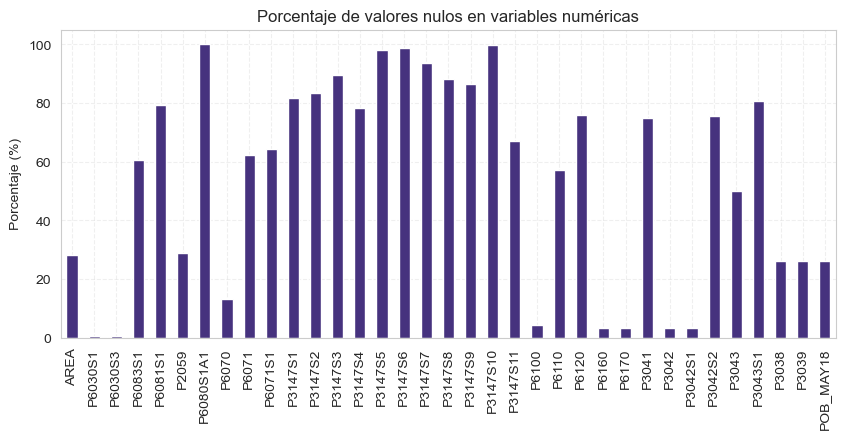

In [117]:
# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 1. Conteo de nulos por columna numérica
null_counts = df[numeric_cols].isnull().sum()
print("Valores nulos por columna numérica:\n", null_counts[null_counts > 0])

# 2. Porcentaje de nulos (para priorizar limpieza)
null_percentage = (df[numeric_cols].isnull().mean() * 100).round(2)
print("\nPorcentaje de nulos por columna numérica:\n", null_percentage[null_percentage > 0])

# 3. Resumen visual (opcional)
import matplotlib.pyplot as plt

null_percentage[null_percentage > 0].plot(kind='bar', figsize=(10, 4))
plt.title("Porcentaje de valores nulos en variables numéricas")
plt.ylabel("Porcentaje (%)")
plt.show()

In [118]:
df['P6040'] = df['P6040'].fillna(-1)  # Asumimos que -1 = "No reportado"

In [119]:
df['P6083S1'] = df['P6083S1'].fillna(0)  # 0 = "No aplica (madre no vive aquí)"

In [121]:
df['P3042'] = df['P3042'].fillna(0)  # 0 = "Ningún nivel educativo"
df['P3043'] = df['P3043'].fillna(0)  # 0 = "Sin título"

In [122]:
# Lista de columnas COVID a eliminar (basado en el diccionario)
columnas_covid = [
    'P3147S1', 'P3147S2', 'P3147S3', 'P3147S4', 'P3147S5', 
    'P3147S6', 'P3147S7', 'P3147S8', 'P3147S9', 'P3147S10', 
    'P3147S11', 'P3147S10A1', 'p3147', 'p31471', 'p31472'
]

# Eliminar solo las columnas que existen en el DataFrame
columnas_a_eliminar = [col for col in columnas_covid if col in df.columns]
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificación
print("Columnas eliminadas:", columnas_a_eliminar)
print("\nNuevo shape del DataFrame:", df.shape)

Columnas eliminadas: ['P3147S1', 'P3147S2', 'P3147S3', 'P3147S4', 'P3147S5', 'P3147S6', 'P3147S7', 'P3147S8', 'P3147S9', 'P3147S10', 'P3147S11', 'P3147S10A1']

Nuevo shape del DataFrame: (70648, 55)


In [124]:
# Eliminar columnas irrelevantes
df.drop(columns=['P6080S1A1', 'P6080S1', 'P6120', 'P3041', 'P6110'], inplace=True)

# Recodificar "No aplica" como 0 o 2 (según contexto)
df['P3043S1'] = df['P3043S1'].fillna(0)  # 0 = No aplica
df['P6081S1'] = df['P6081S1'].fillna(0)  # 0 = Padre no vive aquí
df['P3042S2'] = df['P3042S2'].fillna(0)  # 0 = No alcanzó ese nivel
df['P6071'] = df['P6071'].fillna(2)      # 2 = No tiene cónyuge

In [126]:
# Imputar con moda/mediana
df['P6070'] = df['P6070'].fillna(df['P6070'].mode()[0])  # Ej: 1 = Sí, 2 = No
df['P6100'] = df['P6100'].fillna(df['P6100'].median())   # Si es numérica

# Eliminar filas con NA en columnas con pocos nulos
df.dropna(subset=['P6160', 'P6170', 'P3042S1', 'P6030S1', 'P6030S3'], inplace=True)

In [128]:
# 1. P2059 - ¿Alguna vez fue campesino(a)? (29.21% nulos)
# Asumimos que NA = No aplica (probablemente población urbana)
df['P2059'] = df['P2059'].fillna(3)  # 3 = "No aplica"

# 2. AREA - Área geográfica (27.96% nulos)
# Eliminar filas (pérdida aceptable) o imputar con moda
df['AREA'] = df['AREA'].fillna(df['AREA'].mode()[0])

# 3. P3038 y P3039 - Orientación sexual e identidad de género (23.64% nulos)
# NA probablemente = No responde (sensible)
df['P3038'] = df['P3038'].fillna(9)  # 9 = "No responde"
df['P3039'] = df['P3039'].fillna(9)  # 9 = "No responde"

# 4. POB_MAY18 - Población mayor a 18 años (23.64% nulos)
# Verificar si NA corresponde a menores de edad
df['POB_MAY18'] = df['POB_MAY18'].fillna(0)  # 0 = "No aplica (menor de edad)"

In [130]:
# Verificar que no quedan nulos
print((df.isnull().sum()/len(df)*100).round(2)[(df.isnull().sum()/len(df)*100) > 0])

# Ver distribuciones actualizadas
print("\nDistribución de P2059:")
print(df['P2059'].value_counts(normalize=True)*100)

print("\nDistribución de P3039:")
print(df['P3039'].value_counts(normalize=True)*100)

Series([], dtype: float64)

Distribución de P2059:
P2059
2.0    66.766383
3.0    29.213516
1.0     3.763686
9.0     0.256414
Name: proportion, dtype: float64

Distribución de P3039:
P3039
2.0    41.667281
1.0    34.655683
9.0    23.641669
3.0     0.027999
4.0     0.007368
Name: proportion, dtype: float64


### Tratamiento de datos atipicos

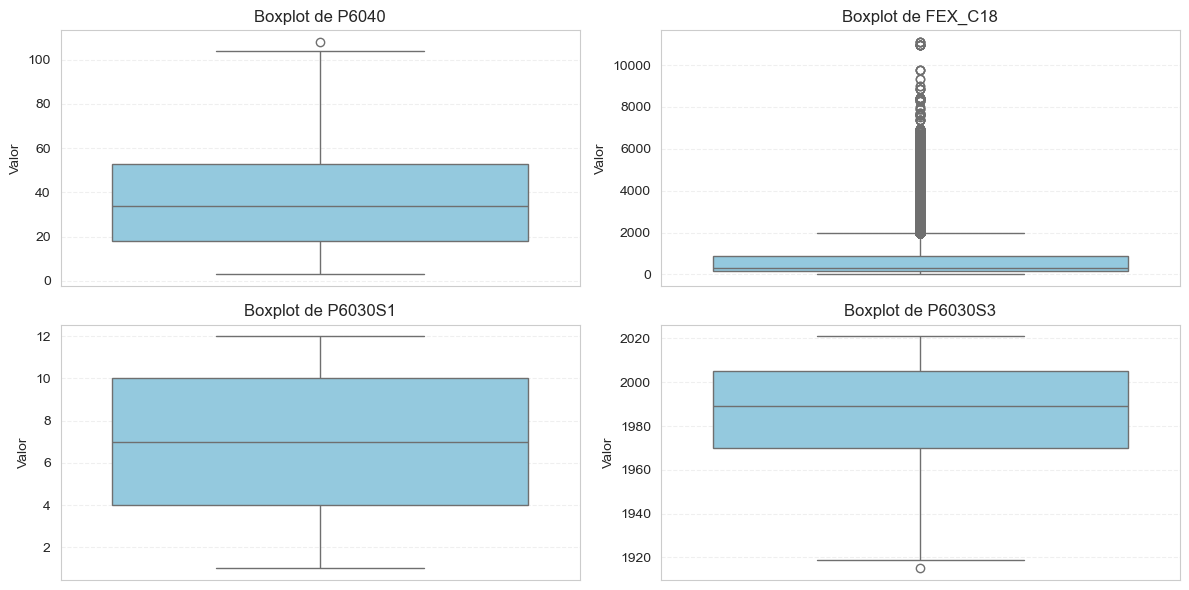


📊 Resumen estadístico:
              P6040       FEX_C18       P6030S1       P6030S3
count  67859.000000  67859.000000  67859.000000  67859.000000
mean      36.508157    724.873084      6.619461   1986.557597
std       21.470885   1015.215156      3.436074     21.469980
min        3.000000      9.586747      1.000000   1915.000000
25%       18.000000    152.883901      4.000000   1970.000000
50%       34.000000    303.406313      7.000000   1989.000000
75%       53.000000    877.085370     10.000000   2005.000000
max      108.000000  11102.640273     12.000000   2021.000000


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir variables numéricas continuas QUE SÍ EXISTAN
vars_boxplot = [col for col in ['P6040', 'FEX_C18', 'P6030S1', 'P6030S3'] if col in df.columns]

# 2. Tratamiento de outliers (ejemplo para edad)
df = df[(df['P6040'] >= 0) & (df['P6040'] <= 110)]

# 3. Generar boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(vars_boxplot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# 4. Mostrar resumen estadístico
print("\n📊 Resumen estadístico:")
print(df[vars_boxplot].describe())

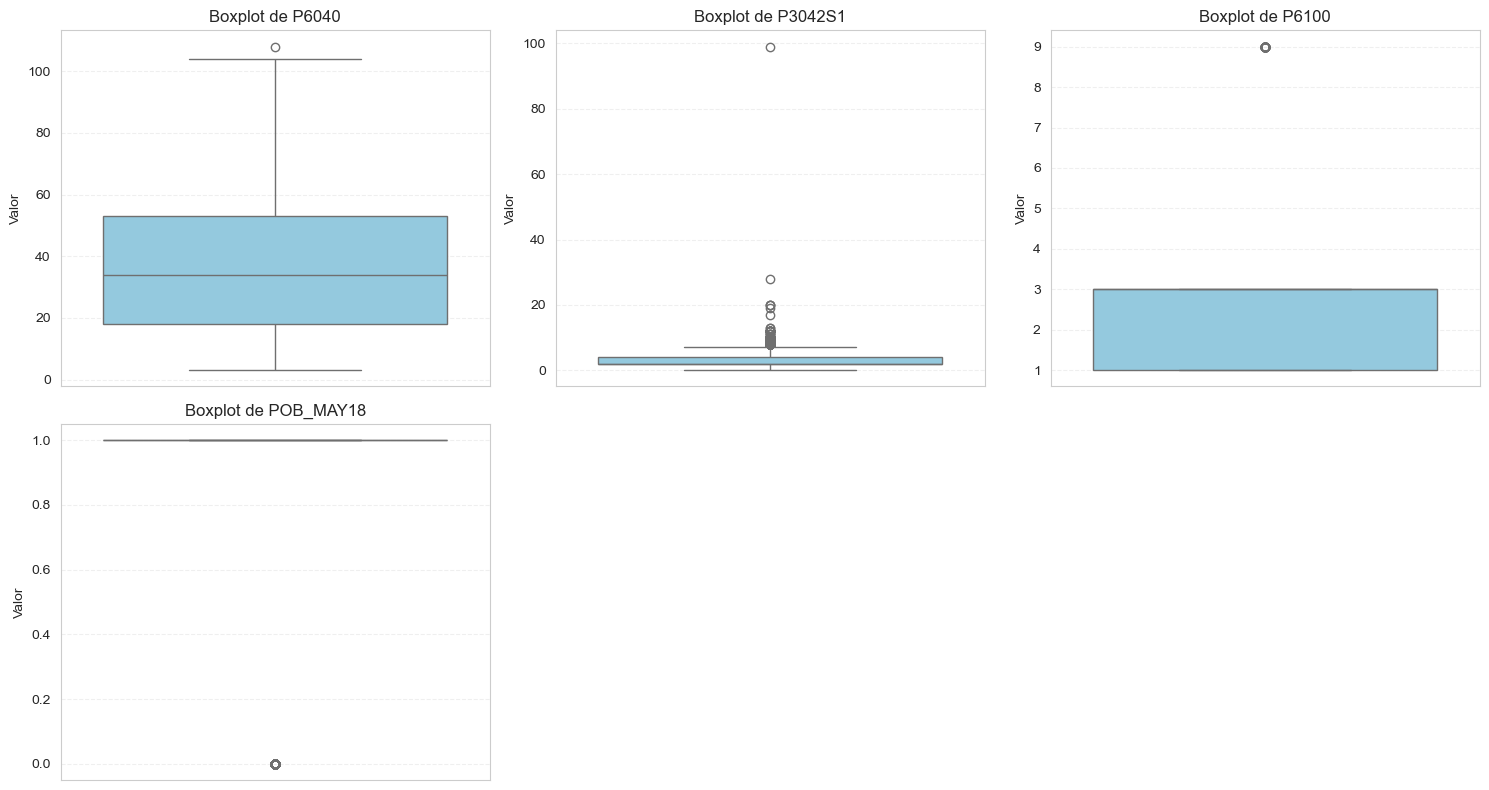

#### Transformación variable FEX_C18

In [136]:
print("📊 Estadísticas de FEX_C18:")
print(df['FEX_C18'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

📊 Estadísticas de FEX_C18:
count    67859.000000
mean       724.873084
std       1015.215156
min          9.586747
1%          30.192856
5%          58.835293
25%        152.883901
50%        303.406313
75%        877.085370
95%       2945.562250
99%       4863.325592
max      11102.640273
Name: FEX_C18, dtype: float64


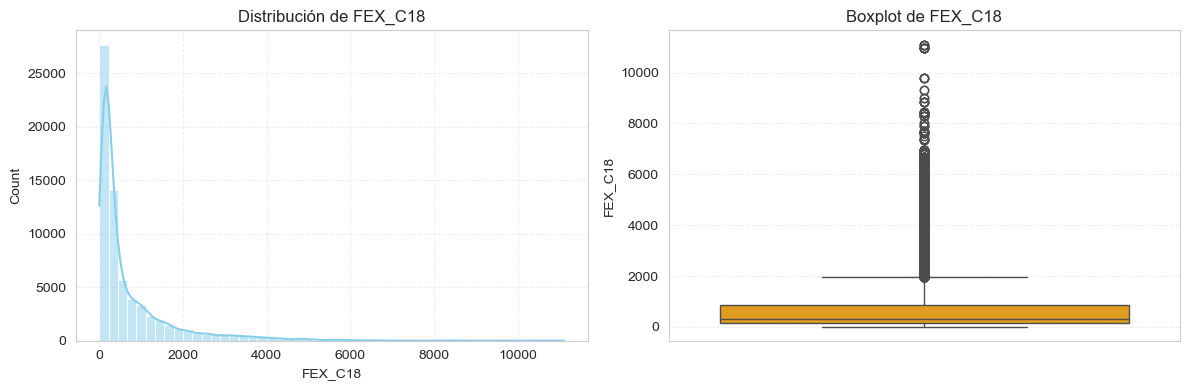

In [139]:
plt.figure(figsize=(12, 4))

# Histograma + Densidad
plt.subplot(1, 2, 1)
sns.histplot(df['FEX_C18'], bins=50, kde=True, color='skyblue')
plt.title("Distribución de FEX_C18")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['FEX_C18'], color='orange')
plt.title("Boxplot de FEX_C18")

plt.tight_layout()
plt.show()

In [138]:
upper_limit = df['FEX_C18'].quantile(0.99)
df['FEX_C18_winsor'] = df['FEX_C18'].clip(upper=upper_limit)

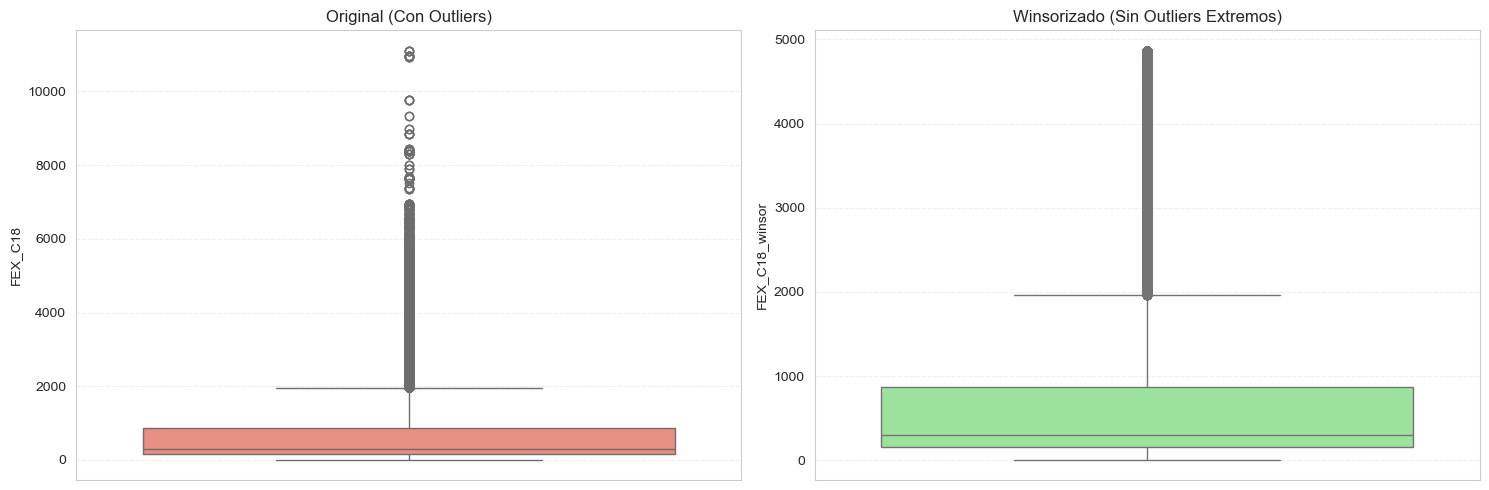

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot Original
sns.boxplot(y=df['FEX_C18'], ax=axes[0], color='salmon')
axes[0].set_title('Original (Con Outliers)')
axes[0].set_ylabel('FEX_C18')

# Boxplot Winsorizado
sns.boxplot(y=df['FEX_C18_winsor'], ax=axes[1], color='lightgreen')
axes[1].set_title('Winsorizado (Sin Outliers Extremos)')

plt.tight_layout()
plt.show()

In [141]:
# Calcular límites post-winsorización (opcional)
q1 = df['FEX_C18_winsor'].quantile(0.25)
q3 = df['FEX_C18_winsor'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

outliers_residuales = df[df['FEX_C18_winsor'] > upper_bound]
print(f"\n🔍 Outliers residuales tras winsorización: {len(outliers_residuales)} registros")


🔍 Outliers residuales tras winsorización: 6549 registros


### Normalización/Escalado de características.

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['FEX_C18_normalized'] = scaler.fit_transform(df[['FEX_C18']])

# Verificación
print("Rango original:", df['FEX_C18'].min(), df['FEX_C18'].max())
print("Rango normalizado:", df['FEX_C18_normalized'].min(), df['FEX_C18_normalized'].max())

Rango original: 9.5867466223 11102.640273
Rango normalizado: 0.0 1.0000000000000002


In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['FEX_C18_standardized'] = scaler.fit_transform(df[['FEX_C18']])

# Verificación
print("Media ≈ 0:", df['FEX_C18_standardized'].mean().round(2))
print("Desviación ≈ 1:", df['FEX_C18_standardized'].std().round(2))

Media ≈ 0: -0.0


AttributeError: 'float' object has no attribute 'round'